In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [189]:
data = pd.read_csv("D:/Hackathon_IFRI_IA_G_8/data/raw/Dataset_brute.csv")

In [190]:
data.iloc[-1]

ID                                              NB.VIDE > 50%
Sexe                                                       3%
Age                                                        2%
Nationalit√©                                                1%
Profession (selon cat√©gorie professionnelle)              13%
                                                    ...      
Rythme Cardiaque/R√©gulier                                 23%
Trouble de la Repolarisation                              20%
Stage de l'IRC                                             0%
Causes Majeure apr√®s Diagnostic/HTA                        0%
Causes Majeure apr√®s Diagnostic/Diab√®te                    0%
Name: 308, Length: 201, dtype: object

In [191]:
df = data.copy()

In [192]:
df = df.iloc[:-1]

In [193]:
df.head()

ID Sexe Age Nationalit√© Profession (selon cat√©gorie professionnelle)  \
0  1    F  50   B√©ninoise                                      Artisan   
1  2    M  28   B√©ninoise                                      Artisan   
2  3    F  69   B√©ninoise                                          NaN   
3  4    M  68   B√©ninoise                                 Entrepreneur   
4  5    F  68   B√©ninoise                                          NaN   

  Adresse (D√©partement) Situation Matrimoniale Motif(s) d'Admission/Asth√©nie  \
0              Littoral               Mari√©(e)                             1   
1                   Zou               Mari√©(e)                             1   
2            Atlantique               Mari√©(e)                             1   
3               Plateau               Mari√©(e)                             1   
4                   NaN               Mari√©(e)                             1   

  Motif(s) d'Admission/Alt√©ration de la fonction r√©nale  \
0                                                  0      
1                                                  1      
2                                                  1      
3                                                  0      
4                                                  1      

  Motif(s) d'Admission/HTA  ... Pathologies/R√©tinopathie diab√©tique  \
0                        0  ...                                   0   
1                        0  ...                                   0   
2                        0  ...                                   0   
3                        1  ...                                   0   
4                        0  ...                                   0   

  Pathologies/Art√©rioscl√©rose Pathologies/Glaucome Autres Pathologies  \
0                         NaN                    0                NaN   
1                         NaN                    0                NaN   
2                         NaN                    0                NaN   
3                         NaN                    0        Flou visuel   
4                         NaN                    1                NaN   

  Rythme Cardiaque/Sinusal Rythme Cardiaque/R√©gulier  \
0                        0                       NaN   
1                        0                       NaN   
2                        0                       NaN   
3                        0                       NaN   
4                        0                       Non   

  Trouble de la Repolarisation Stage de l'IRC  \
0                          NaN          CKD 5   
1                          NaN          CKD 5   
2                          NaN          CKD 5   
3                          Oui          CKD 5   
4                          Non          CKD 5   

  Causes Majeure apr√®s Diagnostic/HTA Causes Majeure apr√®s Diagnostic/Diab√®te  
0                                   0                                       0  
1                                   0                                       0  
2                                   0                                       0  
3                                   0                                       0  
4                                   1                                       0  

[5 rows x 201 columns]

In [194]:
# Lister les colonnes en rapport avec la maladie renal chronique
variables_interessees = [
    # Variables li√©es au rein
    "Contour r√©gulier/Rein gauche",
    "Contour r√©gulier/Rein droit",
    "Calcul R√©nal",
    "Kyste",
    "Diff√©renciation des reins",
    "Echog√©nicit√©",
    "Contour r√©gulier/Rein droit",
    "Contour r√©gulier/Rein gauche",
    
    # Variables li√©es au diab√®te
    "Personnels M√©dicaux/Diab√®te 1",
    "Personnels M√©dicaux/Diab√®te 2",
    "Personnels Familiaux/Diab√®te",
    "Dur√©e Diab√®te 1 (mois)",
    "Dur√©e Diab√®te 2 (mois)",
    "Pathologies/R√©tinopathie diab√©tique",
    "Causes Majeure apr√®s Diagnostic/Diab√®te",
    
    # Variables li√©es √† l'hypertension art√©rielle
    "Personnels M√©dicaux/HTA",
    "Personnels Familiaux/HTA",
    "Dur√©e HTA (mois)",
    "Pathologies/R√©tinopathie hypertensive",
    "Causes Majeure apr√®s Diagnostic/HTA",
    
    # Variables li√©es aux maladies h√©r√©ditaires et g√©n√©tiques
    "Pathologies/Art√©rioscl√©rose",
    "Pathologies/Glaucome",
    
    # Variables li√©es aux infections r√©nales et traitements
    "Personnels M√©dicaux/Pathologies virales (HB, HC, HIV)",
    "Enqu√™te Sociale/Phytoth√©rapie traditionnelle",
    "Enqu√™te Sociale/PEC oui",
    "Enqu√™te Sociale/PEC non",
    
    # Variables li√©es √† la cr√©atinine
    "Cr√©atinine (mg/L)",
    
    # Variables li√©es √† l'√¢ge
    "Age",
    "Sexe"
]

# Afficher la liste des variables
print(variables_interessees)
print(len(variables_interessees))

['Contour r√©gulier/Rein gauche', 'Contour r√©gulier/Rein droit', 'Calcul R√©nal', 'Kyste', 'Diff√©renciation des reins', 'Echog√©nicit√©', 'Contour r√©gulier/Rein droit', 'Contour r√©gulier/Rein gauche', 'Personnels M√©dicaux/Diab√®te 1', 'Personnels M√©dicaux/Diab√®te 2', 'Personnels Familiaux/Diab√®te', 'Dur√©e Diab√®te 1 (mois)', 'Dur√©e Diab√®te 2 (mois)', 'Pathologies/R√©tinopathie diab√©tique', 'Causes Majeure apr√®s Diagnostic/Diab√®te', 'Personnels M√©dicaux/HTA', 'Personnels Familiaux/HTA', 'Dur√©e HTA (mois)', 'Pathologies/R√©tinopathie hypertensive', 'Causes Majeure apr√®s Diagnostic/HTA', 'Pathologies/Art√©rioscl√©rose', 'Pathologies/Glaucome', 'Personnels M√©dicaux/Pathologies virales (HB, HC, HIV)', 'Enqu√™te Sociale/Phytoth√©rapie traditionnelle', 'Enqu√™te Sociale/PEC oui', 'Enqu√™te Sociale/PEC non', 'Cr√©atinine (mg/L)', 'Age', 'Sexe']
29


In [195]:
# Ajouter des variables pertinentes pour pr√©dire le stade de la maladie r√©nale chronique
variables_supplementaires = [
    # Variables li√©es aux sympt√¥mes
    "Sympt√¥mes/Fi√®vre",
    "Sympt√¥mes/C√©phal√©es",
    "Sympt√¥mes/Douleur Lombaire",
    "Sympt√¥mes/Dysurie",
    "Sympt√¥mes/Oligurie",
    "Sympt√¥mes/Diarrh√©e",
    "Sympt√¥mes/Douleur Thoracique",
    
    # Variables li√©es aux analyses biologiques
    "Cr√©atinine (mg/L)",
    "Prot√©inurie",
    "Na^+ (meq/L)",
    "K^+ (meq/L)",
    "Ca^2+ (meq/L)",
    "Cl^- (meq/L)",
    "P (meq/L)",
    "Hb (g/dL)",
    "Hte (%)",
    "H√©matie (T/L)",
    "VGM (fL)",
    "TCMH (pg)",
    "CCMH (%)",
    "Plaquettes (g/L)",
    "Poul (bpm)",
    "Poids (Kg)",
    
    # Variables li√©es aux ant√©c√©dents m√©dicaux
    "Personnels M√©dicaux/IRC",
    "Personnels M√©dicaux/HTA",
    "Personnels M√©dicaux/Diab√®te 1",
    "Personnels M√©dicaux/Diab√®te 2",
    "Personnels M√©dicaux/Pathologies virales (HB, HC, HIV)",
    
    # Variables li√©es aux reins
    "Calcul R√©nal",
    "Kyste",
    "Diff√©renciation des reins",
    "Echog√©nicit√©",
    "Contour r√©gulier/Rein droit",
    "Contour r√©gulier/Rein gauche"
]

# Ajouter ces variables √† la liste existante
variables_interessees.extend(variables_supplementaires)

# Afficher la liste mise √† jour des variables
print("Variables s√©lectionn√©es pour la pr√©diction :")
print(variables_interessees)
print(len(variables_interessees))


Variables s√©lectionn√©es pour la pr√©diction :
['Contour r√©gulier/Rein gauche', 'Contour r√©gulier/Rein droit', 'Calcul R√©nal', 'Kyste', 'Diff√©renciation des reins', 'Echog√©nicit√©', 'Contour r√©gulier/Rein droit', 'Contour r√©gulier/Rein gauche', 'Personnels M√©dicaux/Diab√®te 1', 'Personnels M√©dicaux/Diab√®te 2', 'Personnels Familiaux/Diab√®te', 'Dur√©e Diab√®te 1 (mois)', 'Dur√©e Diab√®te 2 (mois)', 'Pathologies/R√©tinopathie diab√©tique', 'Causes Majeure apr√®s Diagnostic/Diab√®te', 'Personnels M√©dicaux/HTA', 'Personnels Familiaux/HTA', 'Dur√©e HTA (mois)', 'Pathologies/R√©tinopathie hypertensive', 'Causes Majeure apr√®s Diagnostic/HTA', 'Pathologies/Art√©rioscl√©rose', 'Pathologies/Glaucome', 'Personnels M√©dicaux/Pathologies virales (HB, HC, HIV)', 'Enqu√™te Sociale/Phytoth√©rapie traditionnelle', 'Enqu√™te Sociale/PEC oui', 'Enqu√™te Sociale/PEC non', 'Cr√©atinine (mg/L)', 'Age', 'Sexe', 'Sympt√¥mes/Fi√®vre', 'Sympt√¥mes/C√©phal√©es', 'Sympt√¥mes/Douleur Lombaire', 'Sympt

In [196]:
# V√©rifier si toutes les colonnes de variables_interessees existent dans df
colonnes_existantes = [col for col in variables_interessees if col in df.columns]

# Ajouter un avertissement si certaines colonnes sont manquantes
colonnes_manquantes = set(variables_interessees) - set(colonnes_existantes)
if colonnes_manquantes:
    print(f"Avertissement : Les colonnes suivantes sont absentes du DataFrame : {colonnes_manquantes}")

In [197]:
# Ajouter la variable cible aux variables s√©lectionn√©es
variables_interessees.append("Stage de l'IRC")

# Cr√©er un nouveau DataFrame avec les variables s√©lectionn√©es
df1 = df[variables_interessees]

# Afficher les premi√®res lignes du nouveau DataFrame
df1.head()

Contour r√©gulier/Rein gauche Contour r√©gulier/Rein droit Calcul R√©nal Kyste  \
0                          NaN                         NaN          NaN   NaN   
1                          Oui                         Oui          Non   Non   
2                          NaN                         NaN          NaN   NaN   
3                          NaN                         NaN          NaN   NaN   
4                          Oui                         Oui          Non   Non   

  Diff√©renciation des reins        Echog√©nicit√© Contour r√©gulier/Rein droit  \
0                       NaN                 NaN                         NaN   
1         Bien diff√©renci√©s  Hyper Echog√©nicit√©                         Oui   
2                       NaN                 NaN                         NaN   
3                       NaN                 NaN                         NaN   
4         Bien diff√©renci√©s         Homog√©n√©it√©                         Oui   

  Contour r√©gulier/Rein gauche Personnels M√©dicaux/Diab√®te 1  \
0                          NaN                             0   
1                          Oui                             0   
2                          NaN                             0   
3                          NaN                             0   
4                          Oui                             0   

  Personnels M√©dicaux/Diab√®te 2  ... Personnels M√©dicaux/Diab√®te 1  \
0                             0  ...                             0   
1                             0  ...                             0   
2                             1  ...                             0   
3                             0  ...                             0   
4                             0  ...                             0   

  Personnels M√©dicaux/Diab√®te 2  \
0                             0   
1                             0   
2                             1   
3                             0   
4                             0   

  Personnels M√©dicaux/Pathologies virales (HB, HC, HIV) Calcul R√©nal Kyste  \
0                                                  0             NaN   NaN   
1                                                  0             Non   Non   
2                                                  0             NaN   NaN   
3                                                  0             NaN   NaN   
4                                                  0             Non   Non   

  Diff√©renciation des reins        Echog√©nicit√© Contour r√©gulier/Rein droit  \
0                       NaN                 NaN                         NaN   
1         Bien diff√©renci√©s  Hyper Echog√©nicit√©                         Oui   
2                       NaN                 NaN                         NaN   
3                       NaN                 NaN                         NaN   
4         Bien diff√©renci√©s         Homog√©n√©it√©                         Oui   

  Contour r√©gulier/Rein gauche Stage de l'IRC  
0                          NaN          CKD 5  
1                          Oui          CKD 5  
2                          NaN          CKD 5  
3                          NaN          CKD 5  
4                          Oui          CKD 5  

[5 rows x 64 columns]

In [198]:
df1["Stage de l\'IRC"].nunique

<bound method IndexOpsMixin.nunique of 0       CKD 5
1       CKD 5
2       CKD 5
3       CKD 5
4       CKD 5
        ...  
303    CKD 3a
304    CKD 3a
305    CKD 3a
306       NaN
307       NaN
Name: Stage de l'IRC, Length: 308, dtype: object>

In [199]:
import pandas as pd
import numpy as np

# 1. Inspection approfondie des valeurs
print("Valeurs uniques AVANT transformation :")
print(df1["Stage de l\'IRC"].unique())

# 3. Mapping complet avec gestion des cas particuliers
mapping = {
    'CKD 1': 0,
    'CKD 2': 1, 
    'CKD 3a': 2,
    'CKD 3b': 3,
    'CKD 4': 4,
    'CKD 5': 5,
}

# 4. Application robuste du mapping
def safe_mapping(x):
    try:
        return mapping[x]
    except KeyError:
        print(f"Valeur non mapp√©e trouv√©e : {x}")
        return np.nan

df1["Stage de l\'IRC"] = df1["Stage de l\'IRC"].apply(safe_mapping)

# 5. V√©rification des r√©sultats
print("\nValeurs uniques APRES transformation :")
print(df1["Stage de l\'IRC"].unique())

print("\nR√©partition des valeurs :")
print(df1["Stage de l\'IRC"].value_counts(dropna=False).sort_index())



Valeurs uniques AVANT transformation :
['CKD 5' 'CKD 2' 'CKD 4' 'CKD 3a' 'CKD 1' 'CKD 3b' nan]
Valeur non mapp√©e trouv√©e : nan
Valeur non mapp√©e trouv√©e : nan

Valeurs uniques APRES transformation :
[ 5.  1.  4.  2.  0.  3. nan]

R√©partition des valeurs :
Stage de l'IRC
0.0    46
1.0    52
2.0    49
3.0    49
4.0    50
5.0    60
NaN     2
Name: count, dtype: int64


C:\Users\LENOVO YOGA\AppData\Local\Temp\ipykernel_11160\974620215.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Stage de l\'IRC"] = df1["Stage de l\'IRC"].apply(safe_mapping)


In [200]:
# Supprimer les lignes avec des valeurs manquantes dans la colonne "Stage de l'IRC"
df1 = df1.dropna(subset=["Stage de l'IRC"])

# V√©rifier le r√©sultat
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 305
Data columns (total 64 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Contour r√©gulier/Rein gauche                           130 non-null    object 
 1   Contour r√©gulier/Rein droit                            130 non-null    object 
 2   Calcul R√©nal                                           130 non-null    object 
 3   Kyste                                                  130 non-null    object 
 4   Diff√©renciation des reins                              130 non-null    object 
 5   Echog√©nicit√©                                           130 non-null    object 
 6   Contour r√©gulier/Rein droit                            130 non-null    object 
 7   Contour r√©gulier/Rein gauche                           130 non-null    object 
 8   Personnels M√©dicaux/Diab√®te 1                

In [201]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 305
Data columns (total 64 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Contour r√©gulier/Rein gauche                           130 non-null    object 
 1   Contour r√©gulier/Rein droit                            130 non-null    object 
 2   Calcul R√©nal                                           130 non-null    object 
 3   Kyste                                                  130 non-null    object 
 4   Diff√©renciation des reins                              130 non-null    object 
 5   Echog√©nicit√©                                           130 non-null    object 
 6   Contour r√©gulier/Rein droit                            130 non-null    object 
 7   Contour r√©gulier/Rein gauche                           130 non-null    object 
 8   Personnels M√©dicaux/Diab√®te 1                

In [202]:
df.isnull().sum()

ID                                               2
Sexe                                            10
Age                                              9
Nationalit√©                                      5
Profession (selon cat√©gorie professionnelle)    41
                                                ..
Rythme Cardiaque/R√©gulier                       73
Trouble de la Repolarisation                    63
Stage de l'IRC                                   2
Causes Majeure apr√®s Diagnostic/HTA              2
Causes Majeure apr√®s Diagnostic/Diab√®te          2
Length: 201, dtype: int64

In [203]:
df1.describe()

Stage de l'IRC
count      306.000000
mean         2.604575
std          1.730302
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          5.000000

## Test avec le dataframe df1 

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Columns: 201 entries, ID to Causes Majeure apr√®s Diagnostic/Diab√®te
dtypes: object(201)
memory usage: 483.8+ KB


In [205]:
def afficher_colonnes_valeurs_manquantes(df1, seuil):
    """
    Affiche les colonnes ayant plus de `seuil` valeurs manquantes dans le DataFrame,
    calcule la somme des valeurs manquantes pour ces colonnes,
    et retourne le nombre de colonnes concern√©es.

    Parameters:
        df (pd.DataFrame): Le DataFrame √† analyser.
        seuil (int): Le seuil de valeurs manquantes.

    Returns:
        int: Le nombre de colonnes ayant plus de `seuil` valeurs manquantes.
    """
    # Calculer le nombre de valeurs manquantes par colonne
    valeurs_manquantes = df1.isnull().sum()
    
    # Filtrer les colonnes ayant plus de `seuil` valeurs manquantes
    colonnes_filtrees = valeurs_manquantes[valeurs_manquantes > seuil]
    
    # Afficher les colonnes et leurs valeurs manquantes
    print("Colonnes avec plus de", seuil, "valeurs manquantes :")
    print(colonnes_filtrees)
    
    # Calculer la somme des valeurs manquantes pour ces colonnes
    somme_valeurs_manquantes = colonnes_filtrees.sum()
    print("\nSomme totale des valeurs manquantes pour ces colonnes :", somme_valeurs_manquantes)
    
    # Retourner le nombre de colonnes concern√©es
    nombre_colonnes = len(colonnes_filtrees)
    print("\nNombre de colonnes avec plus de", seuil, "valeurs manquantes :", nombre_colonnes)
    
    return nombre_colonnes

# Exemple d'utilisation
nombre_colonnes = afficher_colonnes_valeurs_manquantes(df1, seuil=200)

Colonnes avec plus de 200 valeurs manquantes :
Dur√©e Diab√®te 1 (mois)         304
Dur√©e Diab√®te 2 (mois)         222
Pathologies/Art√©rioscl√©rose    296
Prot√©inurie                    245
Hte (%)                        202
H√©matie (T/L)                  254
dtype: int64

Somme totale des valeurs manquantes pour ces colonnes : 1523

Nombre de colonnes avec plus de 200 valeurs manquantes : 6


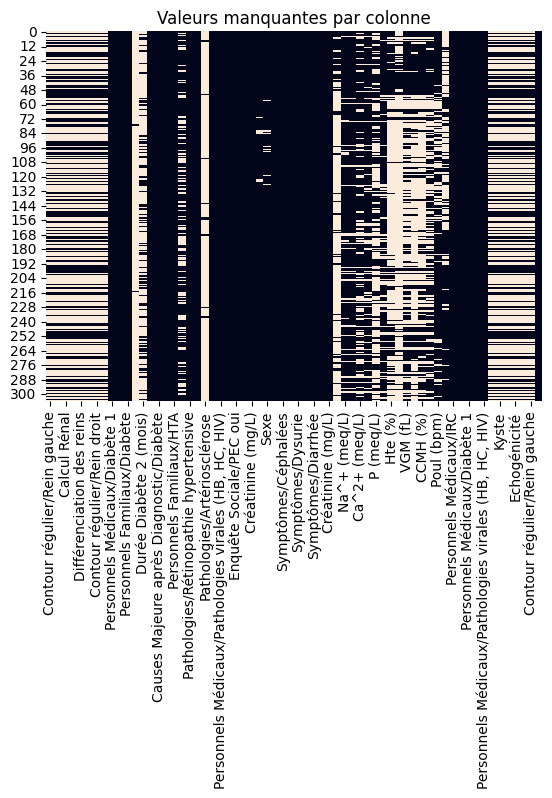

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt  # Importation manquante

sns.heatmap(df1.isnull(), cbar=False)
plt.title("Valeurs manquantes par colonne")
plt.show()

In [207]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentage = df1.isnull().mean() * 100

# Identifier les colonnes ayant plus de 80% de valeurs manquantes
columns_to_drop = missing_percentage[missing_percentage > 80].index

# Afficher les colonnes supprim√©es
print("Colonnes supprim√©es :")
print(columns_to_drop.tolist())

# Supprimer les colonnes du DataFrame
df1 = df1.drop(columns=columns_to_drop)

Colonnes supprim√©es :
['Dur√©e Diab√®te 1 (mois)', 'Pathologies/Art√©rioscl√©rose', 'Prot√©inurie', 'H√©matie (T/L)']


In [208]:
df1.head()

Contour r√©gulier/Rein gauche Contour r√©gulier/Rein droit Calcul R√©nal Kyste  \
0                          NaN                         NaN          NaN   NaN   
1                          Oui                         Oui          Non   Non   
2                          NaN                         NaN          NaN   NaN   
3                          NaN                         NaN          NaN   NaN   
4                          Oui                         Oui          Non   Non   

  Diff√©renciation des reins        Echog√©nicit√© Contour r√©gulier/Rein droit  \
0                       NaN                 NaN                         NaN   
1         Bien diff√©renci√©s  Hyper Echog√©nicit√©                         Oui   
2                       NaN                 NaN                         NaN   
3                       NaN                 NaN                         NaN   
4         Bien diff√©renci√©s         Homog√©n√©it√©                         Oui   

  Contour r√©gulier/Rein gauche Personnels M√©dicaux/Diab√®te 1  \
0                          NaN                             0   
1                          Oui                             0   
2                          NaN                             0   
3                          NaN                             0   
4                          Oui                             0   

  Personnels M√©dicaux/Diab√®te 2  ... Personnels M√©dicaux/Diab√®te 1  \
0                             0  ...                             0   
1                             0  ...                             0   
2                             1  ...                             0   
3                             0  ...                             0   
4                             0  ...                             0   

  Personnels M√©dicaux/Diab√®te 2  \
0                             0   
1                             0   
2                             1   
3                             0   
4                             0   

  Personnels M√©dicaux/Pathologies virales (HB, HC, HIV) Calcul R√©nal Kyste  \
0                                                  0             NaN   NaN   
1                                                  0             Non   Non   
2                                                  0             NaN   NaN   
3                                                  0             NaN   NaN   
4                                                  0             Non   Non   

  Diff√©renciation des reins        Echog√©nicit√© Contour r√©gulier/Rein droit  \
0                       NaN                 NaN                         NaN   
1         Bien diff√©renci√©s  Hyper Echog√©nicit√©                         Oui   
2                       NaN                 NaN                         NaN   
3                       NaN                 NaN                         NaN   
4         Bien diff√©renci√©s         Homog√©n√©it√©                         Oui   

  Contour r√©gulier/Rein gauche Stage de l'IRC  
0                          NaN            5.0  
1                          Oui            5.0  
2                          NaN            5.0  
3                          NaN            5.0  
4                          Oui            5.0  

[5 rows x 60 columns]

In [209]:
# Compter le nombre de valeurs uniques dans la colonne 'Stage de l'IRC'
unique_values_count = df1["Stage de l'IRC"].nunique()
print(f"Nombre de valeurs uniques dans 'Stage de l'IRC' : {unique_values_count}")

Nombre de valeurs uniques dans 'Stage de l'IRC' : 6


In [210]:
df1.head()

Contour r√©gulier/Rein gauche Contour r√©gulier/Rein droit Calcul R√©nal Kyste  \
0                          NaN                         NaN          NaN   NaN   
1                          Oui                         Oui          Non   Non   
2                          NaN                         NaN          NaN   NaN   
3                          NaN                         NaN          NaN   NaN   
4                          Oui                         Oui          Non   Non   

  Diff√©renciation des reins        Echog√©nicit√© Contour r√©gulier/Rein droit  \
0                       NaN                 NaN                         NaN   
1         Bien diff√©renci√©s  Hyper Echog√©nicit√©                         Oui   
2                       NaN                 NaN                         NaN   
3                       NaN                 NaN                         NaN   
4         Bien diff√©renci√©s         Homog√©n√©it√©                         Oui   

  Contour r√©gulier/Rein gauche Personnels M√©dicaux/Diab√®te 1  \
0                          NaN                             0   
1                          Oui                             0   
2                          NaN                             0   
3                          NaN                             0   
4                          Oui                             0   

  Personnels M√©dicaux/Diab√®te 2  ... Personnels M√©dicaux/Diab√®te 1  \
0                             0  ...                             0   
1                             0  ...                             0   
2                             1  ...                             0   
3                             0  ...                             0   
4                             0  ...                             0   

  Personnels M√©dicaux/Diab√®te 2  \
0                             0   
1                             0   
2                             1   
3                             0   
4                             0   

  Personnels M√©dicaux/Pathologies virales (HB, HC, HIV) Calcul R√©nal Kyste  \
0                                                  0             NaN   NaN   
1                                                  0             Non   Non   
2                                                  0             NaN   NaN   
3                                                  0             NaN   NaN   
4                                                  0             Non   Non   

  Diff√©renciation des reins        Echog√©nicit√© Contour r√©gulier/Rein droit  \
0                       NaN                 NaN                         NaN   
1         Bien diff√©renci√©s  Hyper Echog√©nicit√©                         Oui   
2                       NaN                 NaN                         NaN   
3                       NaN                 NaN                         NaN   
4         Bien diff√©renci√©s         Homog√©n√©it√©                         Oui   

  Contour r√©gulier/Rein gauche Stage de l'IRC  
0                          NaN            5.0  
1                          Oui            5.0  
2                          NaN            5.0  
3                          NaN            5.0  
4                          Oui            5.0  

[5 rows x 60 columns]

### Convertir les colonnnes qui ont des valeur s en intervalles par la moyenne de ce intervalle 

In [211]:
import re

def convert_interval(value):
    if isinstance(value, str) and "[" in value and ";" in value:
        numbers = list(map(int, re.findall(r'\d+', value)))
        if numbers:  # V√©rifier que la liste n'est pas vide
            return sum(numbers) / len(numbers)  # Moyenne des bornes
    return value  # Garder les valeurs d√©j√† num√©riques ou non valides

# Appliquer la fonction √† toutes les colonnes du DataFrame
for column in df1.columns:
    df1[column] = df1[column].apply(convert_interval)

In [212]:
import re

def remove_signs(value):
    if isinstance(value, str):  
        numbers = re.findall(r'\d+', value)  # Extraire les nombres
        if numbers:
            return int(numbers[0])  # Garder uniquement le premier nombre trouv√©
    return value  # Retourner la valeur inchang√©e si ce n'est pas du texte

df1 = df1.applymap(remove_signs)  # Appliquer √† toutes les colonnes


C:\Users\LENOVO YOGA\AppData\Local\Temp\ipykernel_11160\4154579084.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df1.applymap(remove_signs)  # Appliquer √† toutes les colonnes


In [213]:
df1

Contour r√©gulier/Rein gauche  Contour r√©gulier/Rein droit  Calcul R√©nal  \
0                             NaN                          NaN           NaN   
1                             Oui                          Oui           Non   
2                             NaN                          NaN           NaN   
3                             NaN                          NaN           NaN   
4                             Oui                          Oui           Non   
..                            ...                          ...           ...   
301                           NaN                          NaN           NaN   
302                           Oui                          Oui           Non   
303                           NaN                          NaN           NaN   
304                           Oui                          Oui           Non   
305                           NaN                          NaN           NaN   

     Kyste  Diff√©renciation des reins        Echog√©nicit√©  \
0      NaN                        NaN                 NaN   
1      Non          Bien diff√©renci√©s  Hyper Echog√©nicit√©   
2      NaN                        NaN                 NaN   
3      NaN                        NaN                 NaN   
4      Non          Bien diff√©renci√©s         Homog√©n√©it√©   
..     ...                        ...                 ...   
301    NaN                        NaN                 NaN   
302    Non   Perte de diff√©renciation         Homog√©n√©it√©   
303    NaN                        NaN                 NaN   
304    Non          Bien diff√©renci√©s         Homog√©n√©it√©   
305    NaN                        NaN                 NaN   

     Contour r√©gulier/Rein droit  Contour r√©gulier/Rein gauche  \
0                            NaN                           NaN   
1                            Oui                           Oui   
2                            NaN                           NaN   
3                            NaN                           NaN   
4                            Oui                           Oui   
..                           ...                           ...   
301                          NaN                           NaN   
302                          Oui                           Oui   
303                          NaN                           NaN   
304                          Oui                           Oui   
305                          NaN                           NaN   

     Personnels M√©dicaux/Diab√®te 1  Personnels M√©dicaux/Diab√®te 2  ...  \
0                                0                              0  ...   
1                                0                              0  ...   
2                                0                              1  ...   
3                                0                              0  ...   
4                                0                              0  ...   
..                             ...                            ...  ...   
301                              0                              0  ...   
302                              0                              0  ...   
303                              0                              0  ...   
304                              0                              1  ...   
305                              0                              0  ...   

     Personnels M√©dicaux/Diab√®te 1  Personnels M√©dicaux/Diab√®te 2  \
0                                0                              0   
1                                0                              0   
2                                0                              1   
3                                0                              0   
4                                0                              0   
..                             ...                            ...   
301                              0                              0   
302                              0         

In [214]:
df1.sample(30)

Contour r√©gulier/Rein gauche  Contour r√©gulier/Rein droit  Calcul R√©nal  \
77                            Oui                          Oui           Non   
239                           NaN                          NaN           NaN   
303                           NaN                          NaN           NaN   
271                           NaN                          NaN           NaN   
110                           NaN                          NaN           NaN   
206                           NaN                          NaN           NaN   
246                           Oui                          Oui           Non   
269                           Oui                          Oui           Non   
124                           Oui                          Oui           Non   
97                            Oui                          Oui           Non   
197                           Oui                          Oui           Non   
67                            Oui                          Oui           Non   
25                            NaN                          NaN           NaN   
44                            Oui                          Oui           Non   
21                            NaN                          NaN           NaN   
134                           Oui                          Oui           Non   
279                           Oui                          Oui           Non   
68                            NaN                          NaN           NaN   
57                            Oui                          Oui           Non   
96                            Oui                          Oui           Non   
40                            Oui                          Oui           Non   
285                           Oui                          Oui           Non   
19                            Oui                          Oui           Non   
242                           Oui                          Oui           Non   
102                           NaN                          NaN           NaN   
16                            NaN                          NaN           NaN   
69                            NaN                          NaN           NaN   
178                           NaN                          NaN           NaN   
218                           NaN                          NaN           NaN   
262                           NaN                          NaN           NaN   

     Kyste  Diff√©renciation des reins        Echog√©nicit√©  \
77     Non   Perte de diff√©renciation  Hyper Echog√©nicit√©   
239    NaN                        NaN                 NaN   
303    NaN                        NaN                 NaN   
271    NaN                        NaN                 NaN   
110    NaN                        NaN                 NaN   
206    NaN                        NaN                 NaN   
246    Non          Bien diff√©renci√©s         Homog√©n√©it√©   
269    Non          Bien diff√©renci√©s         Homog√©n√©it√©   
124    Non   Perte de diff√©renciation  Hyper Echog√©nicit√©   
97     Oui   Perte de diff√©renciation  Hyper Echog√©nicit√©   
197    Non          Bien diff√©renci√©s         Homog√©n√©it√©   
67     Non          Bien diff√©renci√©s         Homog√©n√©it√©   
25     NaN                        NaN                 NaN   
44     Oui   Perte de diff√©renciation  Hyper Echog√©nicit√©   
21     NaN                        NaN                 NaN   
134    Non          Bien diff√©renci√©s         Homog√©n√©it√©   
279    Non          Bien diff√©renci√©s         Homog√©n√©it√©   
68     NaN                        NaN                 NaN   
57     Non   Perte de diff√©renciation  Hyper Echog√©nicit√©   
96     Non          Bien diff√©renci√©s  Hyper Echog√©nicit√©   
40     Non          Bien diff√©renci√©s         Homog√©n√©it√©   
285    Non   Perte de diff√©renciation         Homog√©n√©it√©   
19     Non   Perte de diff√©renciation  Hyper Echog√©nici

In [215]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 305
Data columns (total 60 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Contour r√©gulier/Rein gauche                           130 non-null    object 
 1   Contour r√©gulier/Rein droit                            130 non-null    object 
 2   Calcul R√©nal                                           130 non-null    object 
 3   Kyste                                                  130 non-null    object 
 4   Diff√©renciation des reins                              130 non-null    object 
 5   Echog√©nicit√©                                           130 non-null    object 
 6   Contour r√©gulier/Rein droit                            130 non-null    object 
 7   Contour r√©gulier/Rein gauche                           130 non-null    object 
 8   Personnels M√©dicaux/Diab√®te 1                

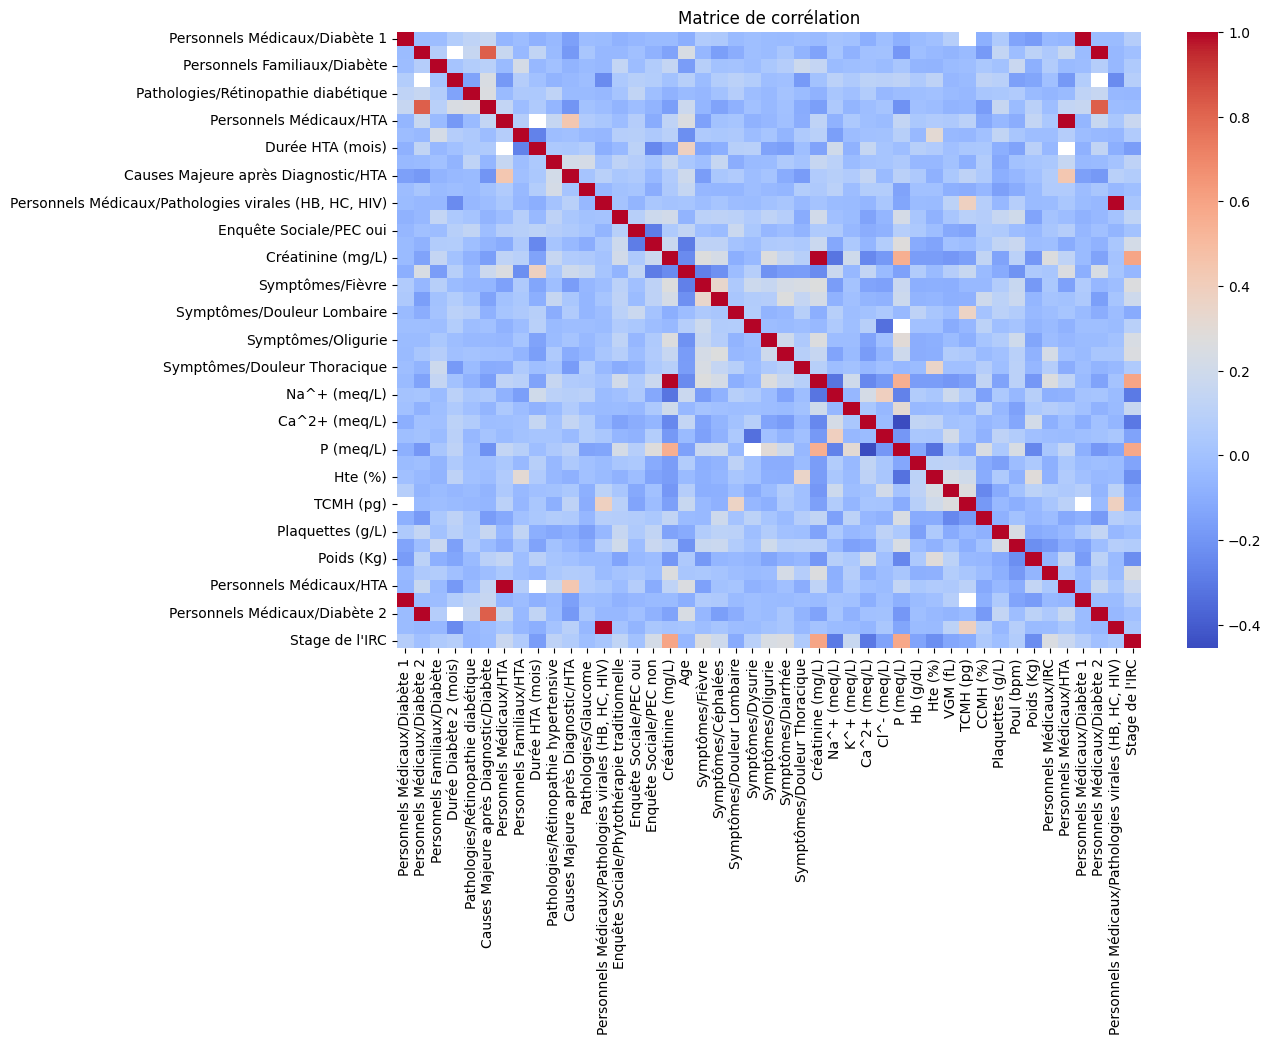

In [216]:
# S√©lectionner uniquement les colonnes num√©riques
numeric_df = df1.select_dtypes(include=['number'])

# Calculer la matrice de corr√©lation
correlation_matrix = numeric_df.corr()

# Visualiser la matrice de corr√©lation avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Matrice de corr√©lation")
plt.show()

In [217]:
df1["Stage de l\'IRC"]

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
301    2.0
302    2.0
303    2.0
304    2.0
305    2.0
Name: Stage de l'IRC, Length: 306, dtype: float64

In [218]:
df1.describe()

Personnels M√©dicaux/Diab√®te 1  Personnels M√©dicaux/Diab√®te 2  \
count                     306.000000                     306.000000   
mean                        0.016340                       0.307190   
std                         0.126987                       0.462084   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       1.000000   
max                         1.000000                       1.000000   

       Personnels Familiaux/Diab√®te  Dur√©e Diab√®te 2 (mois)  \
count                    306.000000               84.000000   
mean                       0.032680               95.642857   
std                        0.178088               36.764193   
min                        0.000000                6.000000   
25%                        0.000000               90.000000   
50%                        0.000000              120.000000   
75%                        0.000000              120.000000   
max                        1.000000              120.000000   

       Pathologies/R√©tinopathie diab√©tique  \
count                           306.000000   
mean                              0.032680   
std                               0.178088   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       Causes Majeure apr√®s Diagnostic/Diab√®te  Personnels M√©dicaux/HTA  \
count                               306.000000               306.000000   
mean                                  0.271242                 0.784314   
std                                   0.445329                 0.411971   
min                                   0.000000                 0.000000   
25%                                   0.000000                 1.000000   
50%                                   0.000000                 1.000000   
75%                                   1.000000                 1.000000   
max                                   1.000000                 1.000000   

       Personnels Familiaux/HTA  Dur√©e HTA (mois)  \
count                306.000000        198.000000   
mean                   0.045752         81.969697   
std                    0.209288         41.083536   
min                    0.000000          6.000000   
25%                    0.000000         36.000000   
50%                    0.000000         90.000000   
75%                    0.000000        120.000000   
max                    1.000000        120.000000   

       Pathologies/R√©tinopathie hypertensive  ...    CCMH (%)  \
count                             306.000000  ...  140.000000   
mean                                0.101307  ...   32.414286   
std                                 0.302229  ...    1.967307   
min                                 0.000000  ...   24.000000   
25%                                 0.000000  ...   31.000000   
50%                                 0.000000  ...   32.500000   
75%                                 0.000000  ...   34.000000   
max                                 1.000000  ...   37.000000   

       Plaquettes (g/L)  Poul (bpm)  Poids (Kg)  Personnels M√©dicaux/IRC  \
count        196.000000  237.000000  180.000000               306.000000   
mean         253.168367   81.645570   74.983333                 0.094771   
std          109.533590   20.029028   17.957266                 0.293378   
min            1.000000    0.000000    9.000000                 0.000000   
25%          181.500000   73.000000   61.750000                 0.000000   
50%          240.500000   83.000000   73.000000                 0.000000   
75%          309.000000   93.000000   87.250000                 0.000000   
max          748.0000

### Copy de df1 dans df_clean et traitement des valeurs manquantes 

In [219]:
# Copie du DataFrame
df_clean = df1.copy()

# 1. S√©lection des colonnes quantitatives (num√©riques)
quantitative_cols = df_clean.select_dtypes(include=['number']).columns
qualitative_cols = df_clean.select_dtypes(exclude=['number']).columns


# 2. Remplacement par la m√©diane pour chaque colonne
for col in quantitative_cols:
    # Calcul de la m√©diane (ignore automatiquement les NaN)
    median_val = df_clean[col].median()
    
    # Remplacement des valeurs manquantes
    df_clean[col] = df_clean[col].fillna(median_val)

for col in qualitative_cols:
    # Calcul du mode (en ignorant les NaN)
    mode_val = df_clean[col].mode().iloc[0] if not df_clean[col].mode().empty else "inconnu"
    
    # Remplacement des NaN
    df_clean[col] = df_clean[col].fillna(mode_val)

# V√©rification
print("Valeurs manquantes apr√®s remplacement :")
print(df_clean.isna().sum())

Valeurs manquantes apr√®s remplacement :
Contour r√©gulier/Rein gauche                             0
Contour r√©gulier/Rein droit                              0
Calcul R√©nal                                             0
Kyste                                                    0
Diff√©renciation des reins                                0
Echog√©nicit√©                                             0
Contour r√©gulier/Rein droit                              0
Contour r√©gulier/Rein gauche                             0
Personnels M√©dicaux/Diab√®te 1                            0
Personnels M√©dicaux/Diab√®te 2                            0
Personnels Familiaux/Diab√®te                             0
Dur√©e Diab√®te 2 (mois)                                   0
Pathologies/R√©tinopathie diab√©tique                      0
Causes Majeure apr√®s Diagnostic/Diab√®te                  0
Personnels M√©dicaux/HTA                                  0
Personnels Familiaux/HTA                              

In [220]:
df_clean.isnull().sum()

Contour r√©gulier/Rein gauche                             0
Contour r√©gulier/Rein droit                              0
Calcul R√©nal                                             0
Kyste                                                    0
Diff√©renciation des reins                                0
Echog√©nicit√©                                             0
Contour r√©gulier/Rein droit                              0
Contour r√©gulier/Rein gauche                             0
Personnels M√©dicaux/Diab√®te 1                            0
Personnels M√©dicaux/Diab√®te 2                            0
Personnels Familiaux/Diab√®te                             0
Dur√©e Diab√®te 2 (mois)                                   0
Pathologies/R√©tinopathie diab√©tique                      0
Causes Majeure apr√®s Diagnostic/Diab√®te                  0
Personnels M√©dicaux/HTA                                  0
Personnels Familiaux/HTA                                 0
Dur√©e HTA (mois)                   

In [221]:
df_clean.describe()

Personnels M√©dicaux/Diab√®te 1  Personnels M√©dicaux/Diab√®te 2  \
count                     306.000000                     306.000000   
mean                        0.016340                       0.307190   
std                         0.126987                       0.462084   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       1.000000   
max                         1.000000                       1.000000   

       Personnels Familiaux/Diab√®te  Dur√©e Diab√®te 2 (mois)  \
count                    306.000000              306.000000   
mean                       0.032680              113.313725   
std                        0.178088               22.053429   
min                        0.000000                6.000000   
25%                        0.000000              120.000000   
50%                        0.000000              120.000000   
75%                        0.000000              120.000000   
max                        1.000000              120.000000   

       Pathologies/R√©tinopathie diab√©tique  \
count                           306.000000   
mean                              0.032680   
std                               0.178088   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       Causes Majeure apr√®s Diagnostic/Diab√®te  Personnels M√©dicaux/HTA  \
count                               306.000000               306.000000   
mean                                  0.271242                 0.784314   
std                                   0.445329                 0.411971   
min                                   0.000000                 0.000000   
25%                                   0.000000                 1.000000   
50%                                   0.000000                 1.000000   
75%                                   1.000000                 1.000000   
max                                   1.000000                 1.000000   

       Personnels Familiaux/HTA  Dur√©e HTA (mois)  \
count                306.000000        306.000000   
mean                   0.045752         84.803922   
std                    0.209288         33.241009   
min                    0.000000          6.000000   
25%                    0.000000         90.000000   
50%                    0.000000         90.000000   
75%                    0.000000        120.000000   
max                    1.000000        120.000000   

       Pathologies/R√©tinopathie hypertensive  ...    CCMH (%)  \
count                             306.000000  ...  306.000000   
mean                                0.101307  ...   32.460784   
std                                 0.302229  ...    1.328785   
min                                 0.000000  ...   24.000000   
25%                                 0.000000  ...   32.500000   
50%                                 0.000000  ...   32.500000   
75%                                 0.000000  ...   32.500000   
max                                 1.000000  ...   37.000000   

       Plaquettes (g/L)  Poul (bpm)  Poids (Kg)  Personnels M√©dicaux/IRC  \
count        306.000000  306.000000  306.000000               306.000000   
mean         248.614379   81.950980   74.166667                 0.094771   
std           87.793368   17.627499   13.791480                 0.293378   
min            1.000000    0.000000    9.000000                 0.000000   
25%          216.000000   76.000000   70.000000                 0.000000   
50%          240.500000   83.000000   73.000000                 0.000000   
75%          270.250000   90.000000   78.000000                 0.000000   
max          748.0000

In [222]:
df_clean

Contour r√©gulier/Rein gauche  Contour r√©gulier/Rein droit  Calcul R√©nal  \
0                             Oui                          Oui           Non   
1                             Oui                          Oui           Non   
2                             Oui                          Oui           Non   
3                             Oui                          Oui           Non   
4                             Oui                          Oui           Non   
..                            ...                          ...           ...   
301                           Oui                          Oui           Non   
302                           Oui                          Oui           Non   
303                           Oui                          Oui           Non   
304                           Oui                          Oui           Non   
305                           Oui                          Oui           Non   

     Kyste  Diff√©renciation des reins        Echog√©nicit√©  \
0      Non          Bien diff√©renci√©s         Homog√©n√©it√©   
1      Non          Bien diff√©renci√©s  Hyper Echog√©nicit√©   
2      Non          Bien diff√©renci√©s         Homog√©n√©it√©   
3      Non          Bien diff√©renci√©s         Homog√©n√©it√©   
4      Non          Bien diff√©renci√©s         Homog√©n√©it√©   
..     ...                        ...                 ...   
301    Non          Bien diff√©renci√©s         Homog√©n√©it√©   
302    Non   Perte de diff√©renciation         Homog√©n√©it√©   
303    Non          Bien diff√©renci√©s         Homog√©n√©it√©   
304    Non          Bien diff√©renci√©s         Homog√©n√©it√©   
305    Non          Bien diff√©renci√©s         Homog√©n√©it√©   

     Contour r√©gulier/Rein droit  Contour r√©gulier/Rein gauche  \
0                            Oui                           Oui   
1                            Oui                           Oui   
2                            Oui                           Oui   
3                            Oui                           Oui   
4                            Oui                           Oui   
..                           ...                           ...   
301                          Oui                           Oui   
302                          Oui                           Oui   
303                          Oui                           Oui   
304                          Oui                           Oui   
305                          Oui                           Oui   

     Personnels M√©dicaux/Diab√®te 1  Personnels M√©dicaux/Diab√®te 2  ...  \
0                                0                              0  ...   
1                                0                              0  ...   
2                                0                              1  ...   
3                                0                              0  ...   
4                                0                              0  ...   
..                             ...                            ...  ...   
301                              0                              0  ...   
302                              0                              0  ...   
303                              0                              0  ...   
304                              0                              1  ...   
305                              0                              0  ...   

     Personnels M√©dicaux/Diab√®te 1  Personnels M√©dicaux/Diab√®te 2  \
0                                0                              0   
1                                0                              0   
2                                0                              1   
3                                0                              0   
4                                0                              0   
..                             ...                            ...   
301                              0                              0   
302          

## Affichage et traitement des valeurs Aberantes et incoherentes avant le traitement

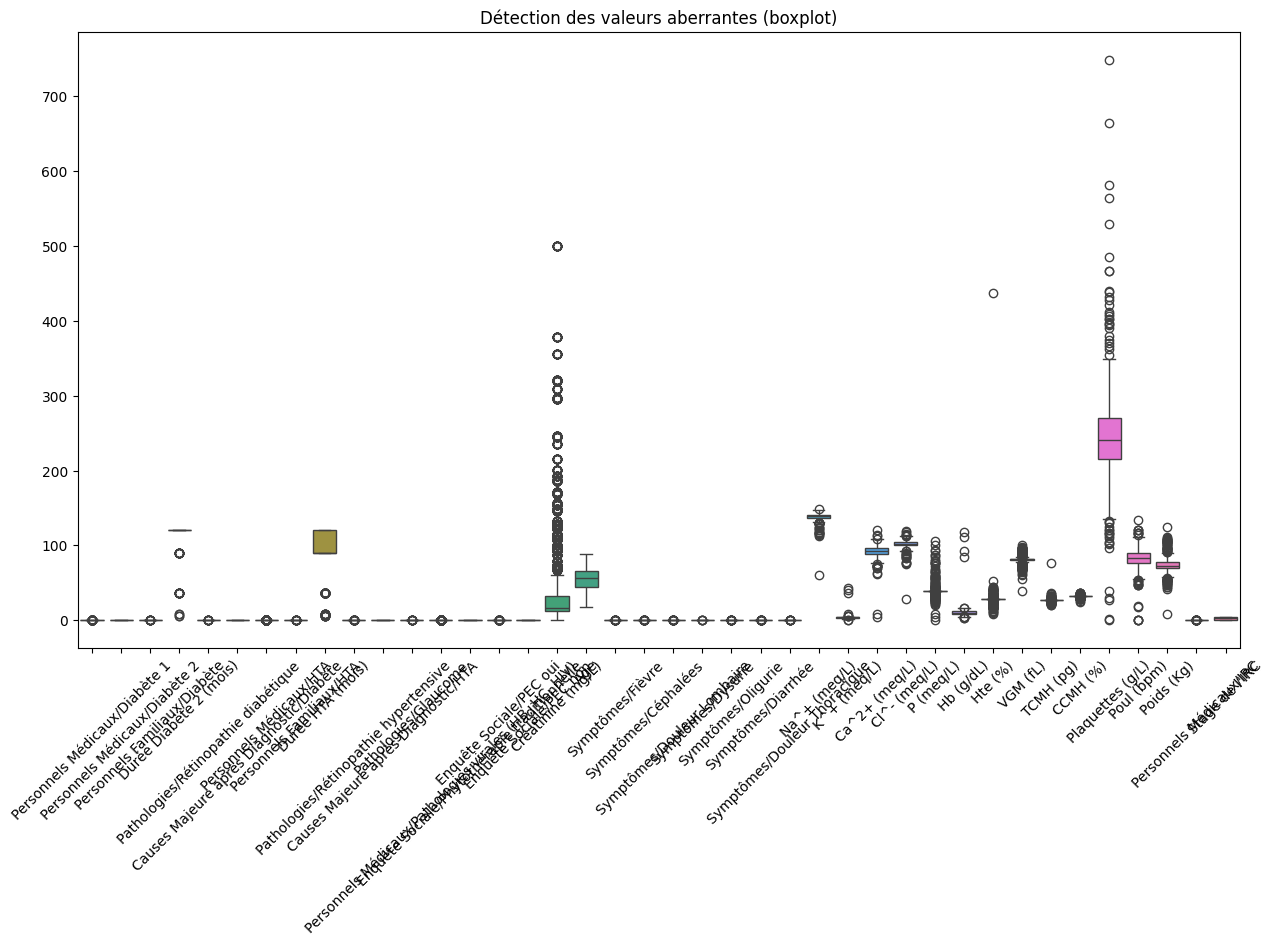

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

# S√©lection des colonnes num√©riques
numeric_cols = df_clean.select_dtypes(include=['number']).columns

# Visualisation des outliers avec boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_clean[numeric_cols])
plt.xticks(rotation=45)
plt.title("D√©tection des valeurs aberrantes (boxplot)")
plt.show()

In [224]:
# Concat√©ner toutes les colonnes en une seule colonne
df_flattened = df_clean.apply(lambda row: ' '.join(row.astype(str)), axis=1)

# Afficher les premi√®res lignes de la colonne r√©sultante
print(df_flattened.head())

0    Oui Oui Non Non Bien diff√©renci√©s Homog√©n√©it√© ...
1    Oui Oui Non Non Bien diff√©renci√©s Hyper Echog√©...
2    Oui Oui Non Non Bien diff√©renci√©s Homog√©n√©it√© ...
3    Oui Oui Non Non Bien diff√©renci√©s Homog√©n√©it√© ...
4    Oui Oui Non Non Bien diff√©renci√©s Homog√©n√©it√© ...
dtype: object


In [225]:
import re

def convert_to_single_dimension(value):
    """
    Convertit une valeur non unidimensionnelle (par exemple, un intervalle ou une liste)
    en une seule dimension, comme la moyenne des bornes d'un intervalle.

    Parameters:
        value: La valeur √† convertir.

    Returns:
        La valeur convertie en une seule dimension.
    """
    if isinstance(value, str) and "[" in value and ";" in value:
        # Extraire les nombres dans l'intervalle
        numbers = list(map(float, re.findall(r'\d+\.?\d*', value)))
        if numbers:
            return sum(numbers) / len(numbers)  # Moyenne des bornes
    return value  # Retourner la valeur inchang√©e si elle est d√©j√† unidimensionnelle

# Appliquer la fonction √† toutes les colonnes de df_clean
for column in df_clean.columns:
    df_clean[column] = df_clean[column].apply(convert_to_single_dimension)

# V√©rifier le r√©sultat
print("Transformation termin√©e. Voici un aper√ßu des donn√©es :")
print(df_clean.head())

Transformation termin√©e. Voici un aper√ßu des donn√©es :
   Contour r√©gulier/Rein gauche  Contour r√©gulier/Rein droit  Calcul R√©nal  \
0                           Oui                          Oui           Non   
1                           Oui                          Oui           Non   
2                           Oui                          Oui           Non   
3                           Oui                          Oui           Non   
4                           Oui                          Oui           Non   

   Kyste  Diff√©renciation des reins        Echog√©nicit√©  \
0    Non          Bien diff√©renci√©s         Homog√©n√©it√©   
1    Non          Bien diff√©renci√©s  Hyper Echog√©nicit√©   
2    Non          Bien diff√©renci√©s         Homog√©n√©it√©   
3    Non          Bien diff√©renci√©s         Homog√©n√©it√©   
4    Non          Bien diff√©renci√©s         Homog√©n√©it√©   

   Contour r√©gulier/Rein droit  Contour r√©gulier/Rein gauche  \
0                     

In [226]:
# Identifier les colonnes non uniques
non_unique_columns = df_clean.columns[df_clean.columns.duplicated()].tolist()

# Supprimer les colonnes non uniques
df_clean = df_clean.loc[:, ~df_clean.columns.duplicated()]

# V√©rifier les colonnes restantes
print("Colonnes restantes apr√®s suppression des colonnes non uniques :")
print(df_clean.columns)

Colonnes restantes apr√®s suppression des colonnes non uniques :
Index(['Contour r√©gulier/Rein gauche', 'Contour r√©gulier/Rein droit',
       'Calcul R√©nal', 'Kyste', 'Diff√©renciation des reins', 'Echog√©nicit√©',
       'Personnels M√©dicaux/Diab√®te 1', 'Personnels M√©dicaux/Diab√®te 2',
       'Personnels Familiaux/Diab√®te', 'Dur√©e Diab√®te 2 (mois)',
       'Pathologies/R√©tinopathie diab√©tique',
       'Causes Majeure apr√®s Diagnostic/Diab√®te', 'Personnels M√©dicaux/HTA',
       'Personnels Familiaux/HTA', 'Dur√©e HTA (mois)',
       'Pathologies/R√©tinopathie hypertensive',
       'Causes Majeure apr√®s Diagnostic/HTA', 'Pathologies/Glaucome',
       'Personnels M√©dicaux/Pathologies virales (HB, HC, HIV)',
       'Enqu√™te Sociale/Phytoth√©rapie traditionnelle',
       'Enqu√™te Sociale/PEC oui', 'Enqu√™te Sociale/PEC non',
       'Cr√©atinine (mg/L)', 'Age', 'Sexe', 'Sympt√¥mes/Fi√®vre',
       'Sympt√¥mes/C√©phal√©es', 'Sympt√¥mes/Douleur Lombaire',
       'Sympt√¥mes

In [229]:
df_clean["Sexe"]

0      F
1      M
2      F
3      M
4      F
      ..
301    F
302    F
303    F
304    F
305    F
Name: Sexe, Length: 306, dtype: object


Variable: Contour r√©gulier/Rein gauche
Valeurs potentiellement incoh√©rentes (trop rares):
Contour r√©gulier/Rein gauche
Non    1
Name: count, dtype: int64


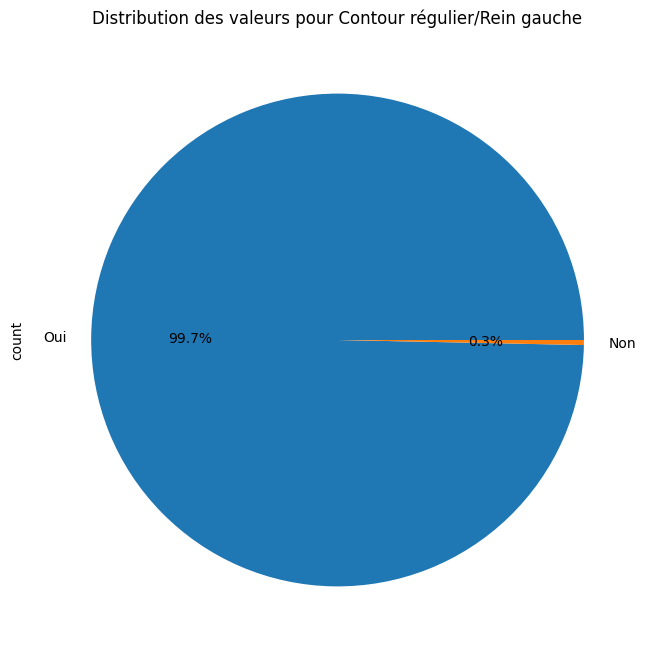


Variable: Contour r√©gulier/Rein droit
Valeurs potentiellement incoh√©rentes (trop rares):
Contour r√©gulier/Rein droit
Non    3
Name: count, dtype: int64


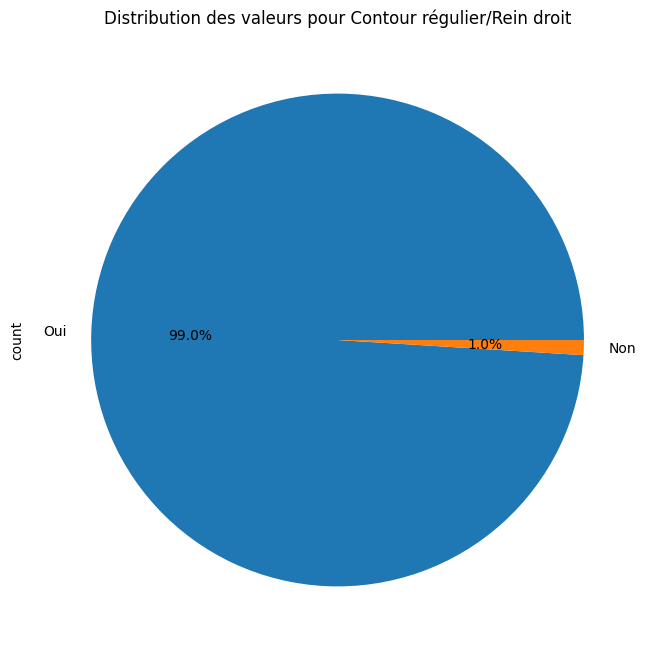


Variable: Echog√©nicit√©
Valeurs potentiellement incoh√©rentes (trop rares):
Echog√©nicit√©
Hypo Echog√©nicit√©    1
Name: count, dtype: int64


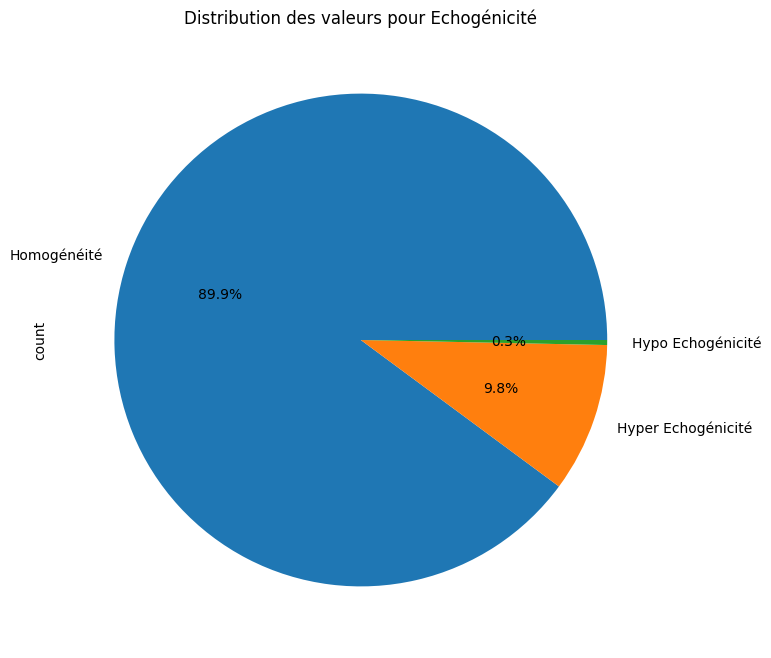

In [228]:
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    # Comptage des valeurs uniques
    value_counts = df_clean[col].value_counts()
    
    # D√©tection des valeurs rares (potentiellement erron√©es)
    threshold = 0.01 * len(df_clean)  # 1% des donn√©es comme seuil
    rare_values = value_counts[value_counts < threshold]
    
    if not rare_values.empty:
        print(f"\nVariable: {col}")
        print("Valeurs potentiellement incoh√©rentes (trop rares):")
        print(rare_values)
        
        # Pie chart des valeurs
        plt.figure(figsize=(8, 8))
        df_clean[col].value_counts().plot.pie(autopct='%1.1f%%')
        plt.title(f"Distribution des valeurs pour {col}")
        plt.show()

In [230]:
# Suppression des valeurs incoh√©rentes dans les colonnes sp√©cifiques
# Exemple : Suppression des lignes o√π la valeur de "Echog√©nicit√©" est "Hypo Echog√©nicit√©"
df_clean = df_clean[df_clean["Echog√©nicit√©"] != "Hypo Echog√©nicit√©"]

# V√©rification apr√®s suppression
print("Valeurs restantes apr√®s suppression des incoh√©rences :")
print(df_clean["Echog√©nicit√©"].value_counts())

Valeurs restantes apr√®s suppression des incoh√©rences :
Echog√©nicit√©
Homog√©n√©it√©           275
Hyper Echog√©nicit√©     30
Name: count, dtype: int64


In [231]:
df_clean

Contour r√©gulier/Rein gauche Contour r√©gulier/Rein droit Calcul R√©nal  \
0                            Oui                         Oui          Non   
1                            Oui                         Oui          Non   
2                            Oui                         Oui          Non   
3                            Oui                         Oui          Non   
4                            Oui                         Oui          Non   
..                           ...                         ...          ...   
301                          Oui                         Oui          Non   
302                          Oui                         Oui          Non   
303                          Oui                         Oui          Non   
304                          Oui                         Oui          Non   
305                          Oui                         Oui          Non   

    Kyste Diff√©renciation des reins        Echog√©nicit√©  \
0     Non         Bien diff√©renci√©s         Homog√©n√©it√©   
1     Non         Bien diff√©renci√©s  Hyper Echog√©nicit√©   
2     Non         Bien diff√©renci√©s         Homog√©n√©it√©   
3     Non         Bien diff√©renci√©s         Homog√©n√©it√©   
4     Non         Bien diff√©renci√©s         Homog√©n√©it√©   
..    ...                       ...                 ...   
301   Non         Bien diff√©renci√©s         Homog√©n√©it√©   
302   Non  Perte de diff√©renciation         Homog√©n√©it√©   
303   Non         Bien diff√©renci√©s         Homog√©n√©it√©   
304   Non         Bien diff√©renci√©s         Homog√©n√©it√©   
305   Non         Bien diff√©renci√©s         Homog√©n√©it√©   

     Personnels M√©dicaux/Diab√®te 1  Personnels M√©dicaux/Diab√®te 2  \
0                                0                              0   
1                                0                              0   
2                                0                              1   
3                                0                              0   
4                                0                              0   
..                             ...                            ...   
301                              0                              0   
302                              0                              0   
303                              0                              0   
304                              0                              1   
305                              0                              0   

     Personnels Familiaux/Diab√®te  Dur√©e Diab√®te 2 (mois)  ...  Hb (g/dL)  \
0                               0                   120.0  ...       11.0   
1                               0                   120.0  ...        9.0   
2                               0                    90.0  ...        9.0   
3                               0                   120.0  ...        8.0   
4                               0                   120.0  ...        9.0   
..                            ...                     ...  ...        ...   
301                             0                   120.0  ...       12.0   
302                             0                   120.0  ...       10.0   
303                             0                   120.0  ...       10.0   
304                             0                   120.0  ...       12.0   
305                             0                   120.0  ...       11.0   

     Hte (%)  VGM (fL)  TCMH (pg)  CCMH (%)  Plaquettes (g/L)  Poul (bpm)  \
0       32.0      88.0       31.0      35.0             309.0        85.0   
1       30.0      74.0       23.0      31.0             421.0       110.0   
2       28.0      81.0       27.0      34.0             185.0        19.0   
3       24.0      95.0       32.0      33.0             343.0        82.0   
4       28.0      69.0       22.0      32.0             248.0        69.0   
..       ...       ...        ...       ...               ...         ...   
301     41.0    


Variable: Personnels M√©dicaux/Diab√®te 1
Valeurs aberrantes d√©tect√©es: 5
Plage normale: [0.00, 0.00]
Exemples d'outliers:
     Personnels M√©dicaux/Diab√®te 1
54                               1
55                               1
77                               1
215                              1
216                              1


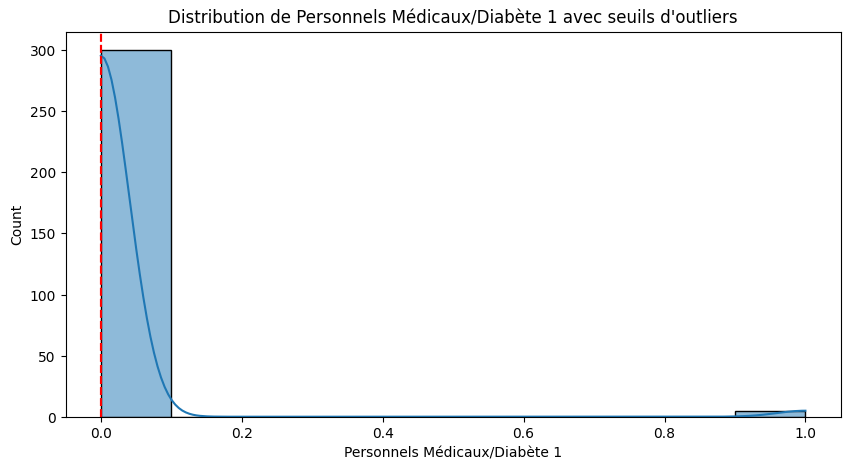


Variable: Personnels Familiaux/Diab√®te
Valeurs aberrantes d√©tect√©es: 10
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Personnels Familiaux/Diab√®te
8                              1
11                             1
13                             1
28                             1
36                             1


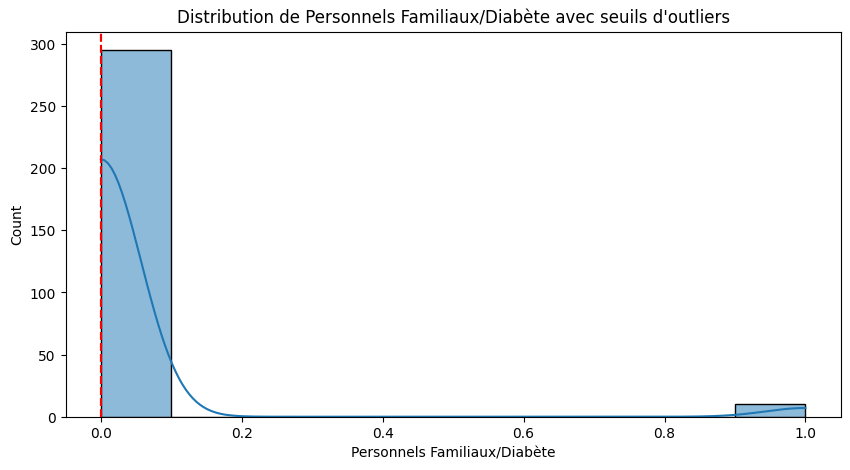


Variable: Dur√©e Diab√®te 2 (mois)
Valeurs aberrantes d√©tect√©es: 32
Plage normale: [120.00, 120.00]
Exemples d'outliers:
    Dur√©e Diab√®te 2 (mois)
2                     90.0
15                    90.0
16                    36.0
26                    90.0
34                    36.0


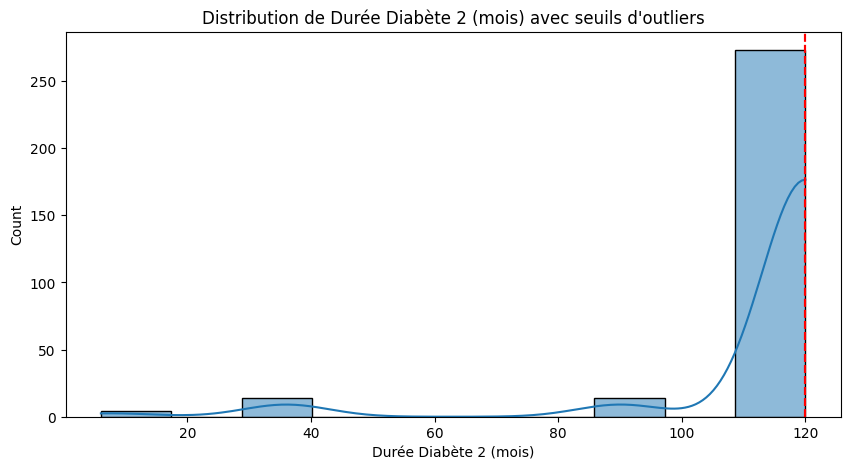


Variable: Pathologies/R√©tinopathie diab√©tique
Valeurs aberrantes d√©tect√©es: 10
Plage normale: [0.00, 0.00]
Exemples d'outliers:
     Pathologies/R√©tinopathie diab√©tique
54                                     1
146                                    1
222                                    1
252                                    1
259                                    1


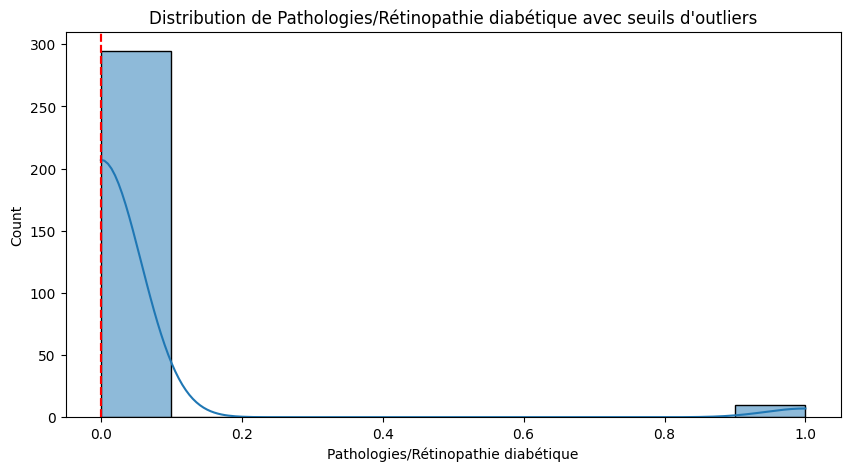


Variable: Personnels M√©dicaux/HTA
Valeurs aberrantes d√©tect√©es: 66
Plage normale: [1.00, 1.00]
Exemples d'outliers:
    Personnels M√©dicaux/HTA
1                         0
3                         0
7                         0
13                        0
14                        0


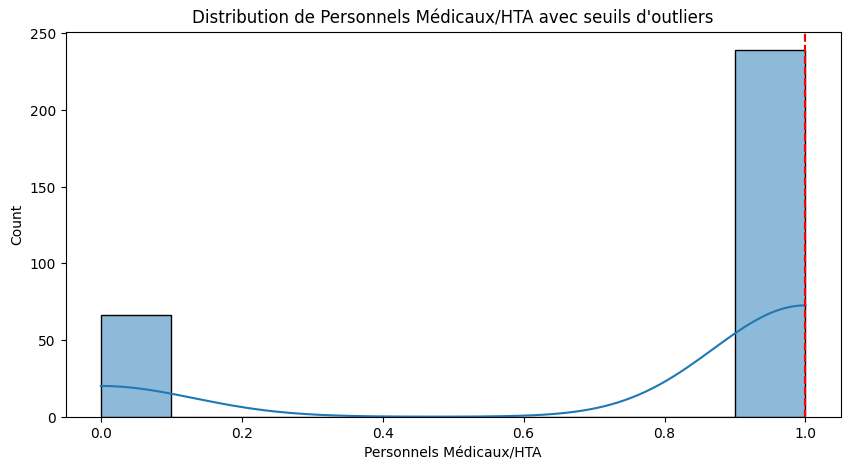


Variable: Personnels Familiaux/HTA
Valeurs aberrantes d√©tect√©es: 14
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Personnels Familiaux/HTA
20                         1
21                         1
26                         1
36                         1
41                         1


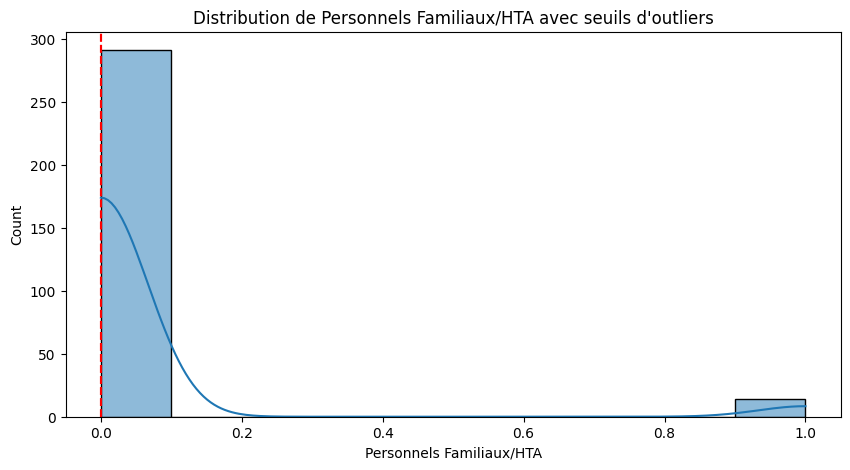


Variable: Dur√©e HTA (mois)
Valeurs aberrantes d√©tect√©es: 70
Plage normale: [45.00, 165.00]
Exemples d'outliers:
    Dur√©e HTA (mois)
6                9.0
9                6.0
10               6.0
12               9.0
20              36.0


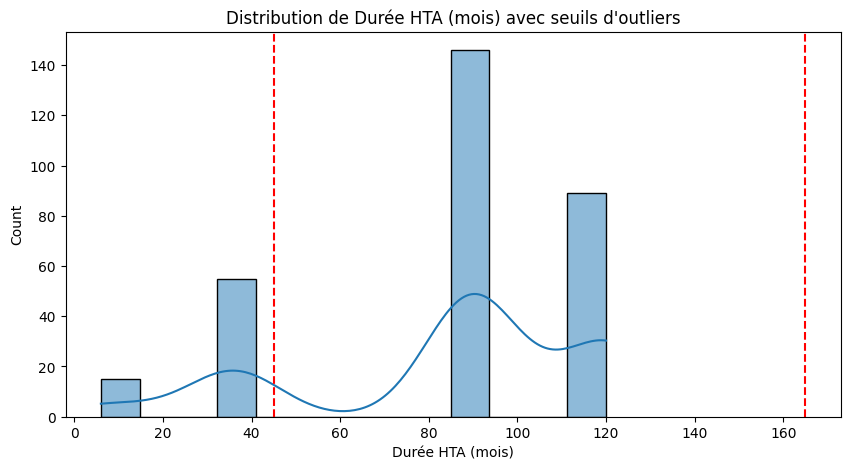


Variable: Pathologies/R√©tinopathie hypertensive
Valeurs aberrantes d√©tect√©es: 31
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Pathologies/R√©tinopathie hypertensive
4                                       1
7                                       1
8                                       1
17                                      1
26                                      1


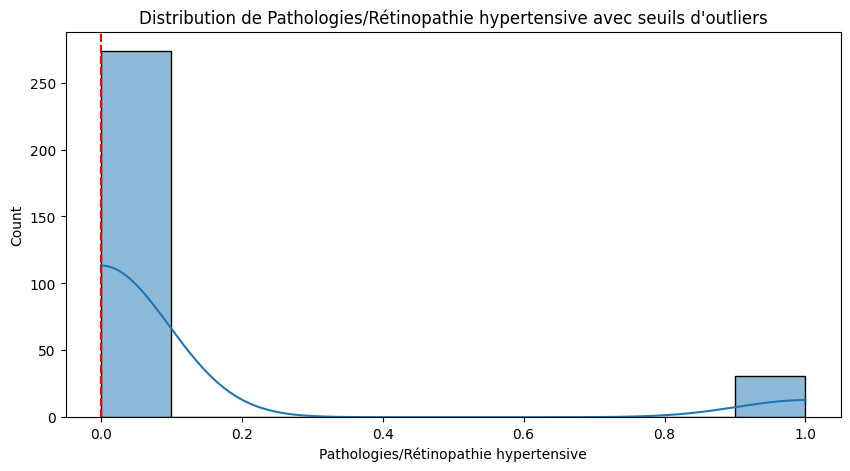


Variable: Pathologies/Glaucome
Valeurs aberrantes d√©tect√©es: 11
Plage normale: [0.00, 0.00]
Exemples d'outliers:
     Pathologies/Glaucome
4                       1
67                      1
74                      1
84                      1
100                     1


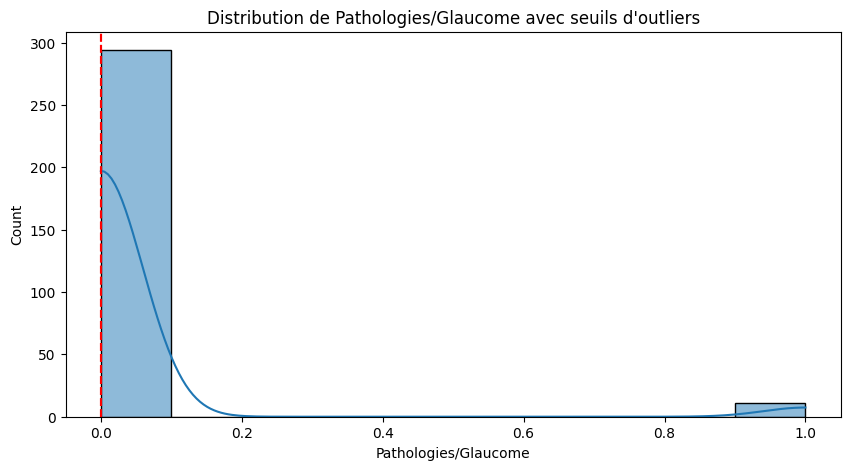


Variable: Personnels M√©dicaux/Pathologies virales (HB, HC, HIV)
Valeurs aberrantes d√©tect√©es: 18
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Personnels M√©dicaux/Pathologies virales (HB, HC, HIV)
10                                                  1    
34                                                  1    
42                                                  1    
57                                                  1    
75                                                  1    


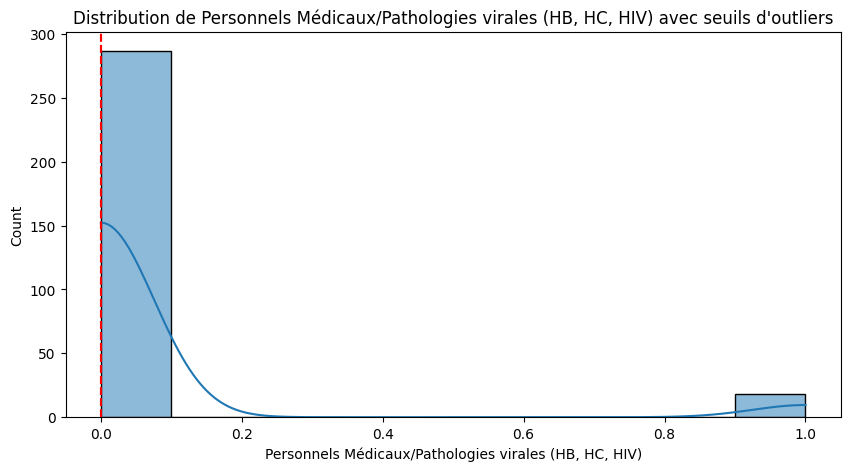


Variable: Enqu√™te Sociale/PEC oui
Valeurs aberrantes d√©tect√©es: 44
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Enqu√™te Sociale/PEC oui
2                         1
4                         1
21                        1
25                        1
32                        1


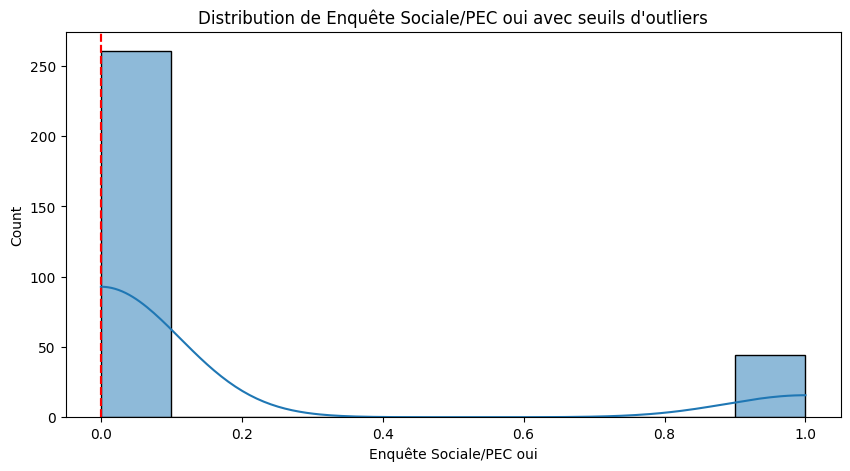


Variable: Cr√©atinine (mg/L)
Valeurs aberrantes d√©tect√©es: 50
Plage normale: [-16.50, 59.50]
Exemples d'outliers:
   Cr√©atinine (mg/L)
0                169
4                500
5                156
6                112
7                171


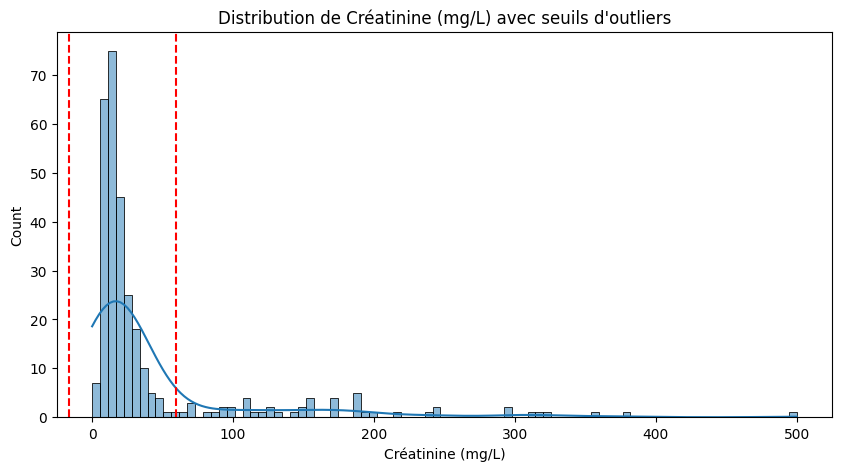


Variable: Sympt√¥mes/Fi√®vre
Valeurs aberrantes d√©tect√©es: 23
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Sympt√¥mes/Fi√®vre
0                  1
1                  1
6                  1
13                 1
15                 1


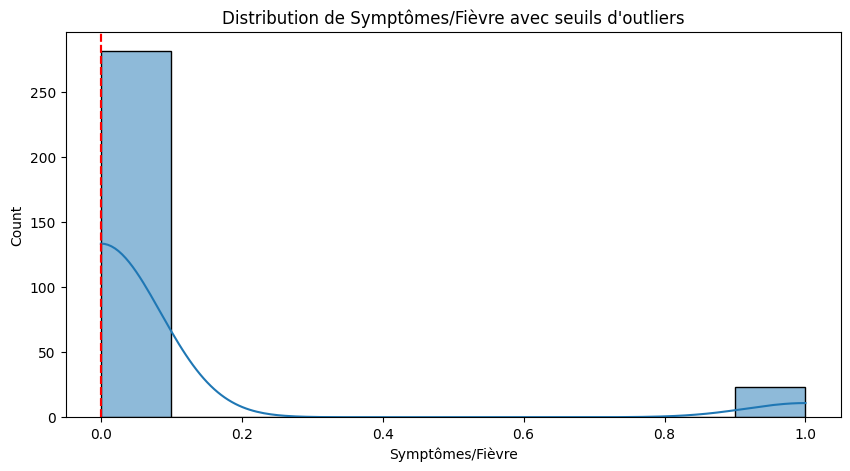


Variable: Sympt√¥mes/C√©phal√©es
Valeurs aberrantes d√©tect√©es: 28
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Sympt√¥mes/C√©phal√©es
0                     1
1                     1
6                     1
17                    1
22                    1


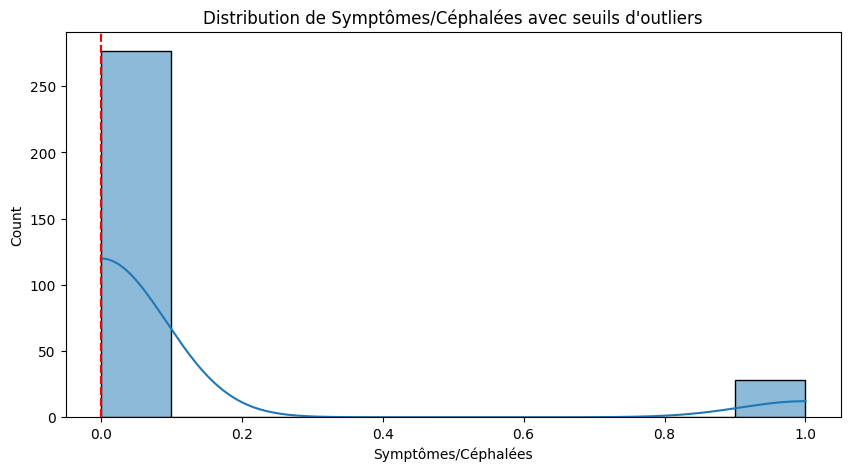


Variable: Sympt√¥mes/Douleur Lombaire
Valeurs aberrantes d√©tect√©es: 26
Plage normale: [0.00, 0.00]
Exemples d'outliers:
     Sympt√¥mes/Douleur Lombaire
0                             1
41                            1
110                           1
137                           1
157                           1


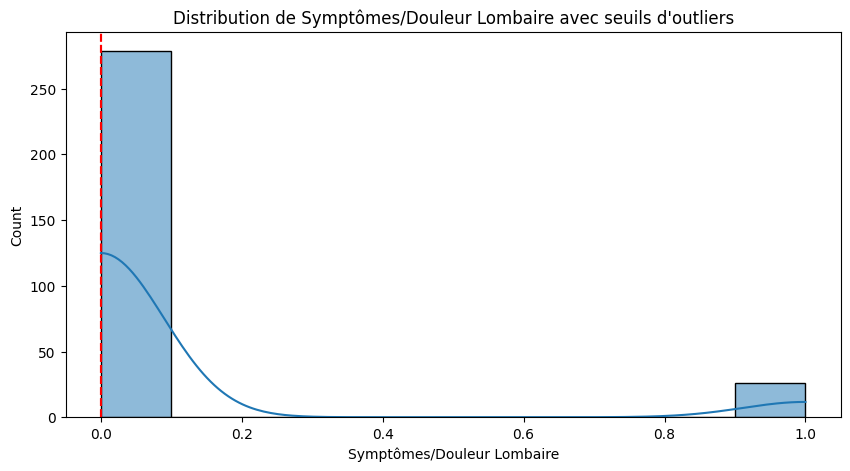


Variable: Sympt√¥mes/Dysurie
Valeurs aberrantes d√©tect√©es: 4
Plage normale: [0.00, 0.00]
Exemples d'outliers:
     Sympt√¥mes/Dysurie
32                   1
142                  1
214                  1
263                  1


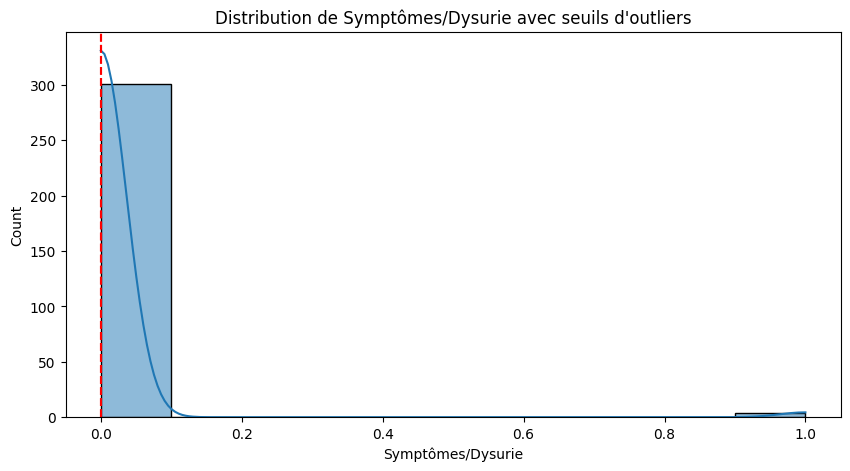


Variable: Sympt√¥mes/Oligurie
Valeurs aberrantes d√©tect√©es: 15
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Sympt√¥mes/Oligurie
6                    1
7                    1
14                   1
28                   1
30                   1


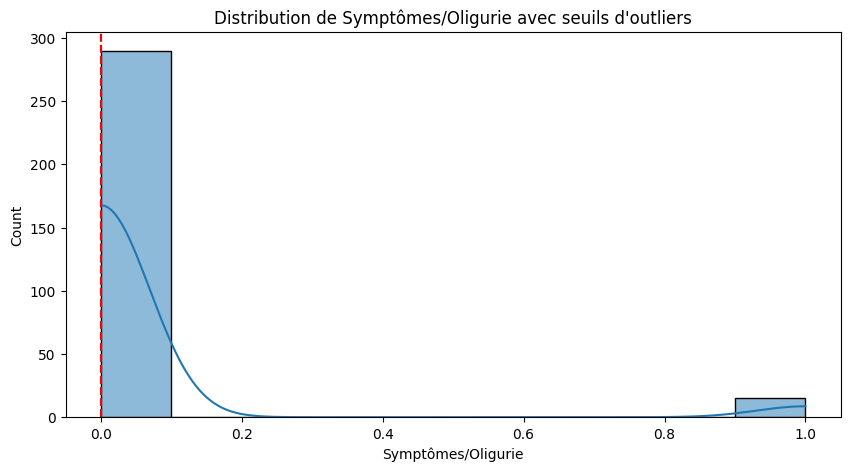


Variable: Sympt√¥mes/Diarrh√©e
Valeurs aberrantes d√©tect√©es: 25
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Sympt√¥mes/Diarrh√©e
1                    1
2                    1
6                    1
14                   1
15                   1


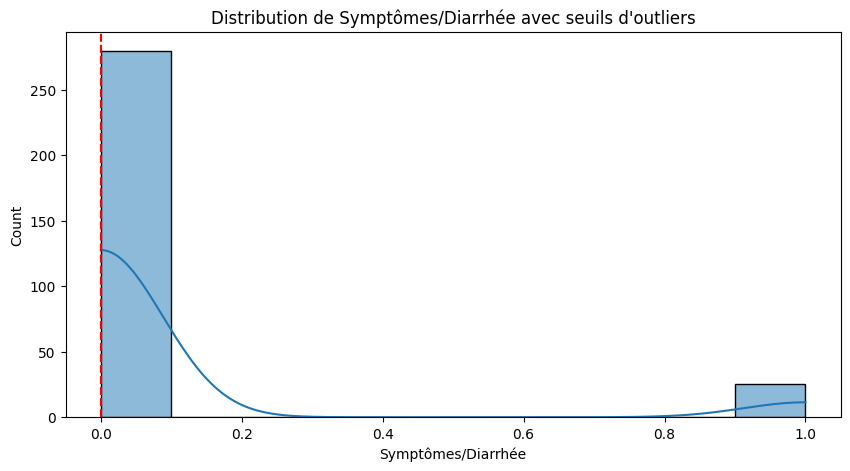


Variable: Sympt√¥mes/Douleur Thoracique
Valeurs aberrantes d√©tect√©es: 9
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Sympt√¥mes/Douleur Thoracique
0                              1
13                             1
27                             1
28                             1
29                             1


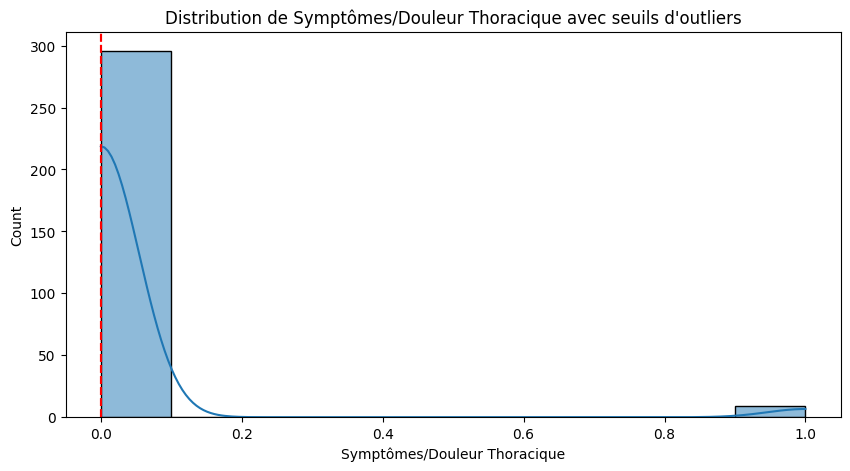


Variable: Cr√©atinine (mg/L)
Valeurs aberrantes d√©tect√©es: 50
Plage normale: [-16.50, 59.50]
Exemples d'outliers:
   Cr√©atinine (mg/L)
0                169
4                500
5                156
6                112
7                171


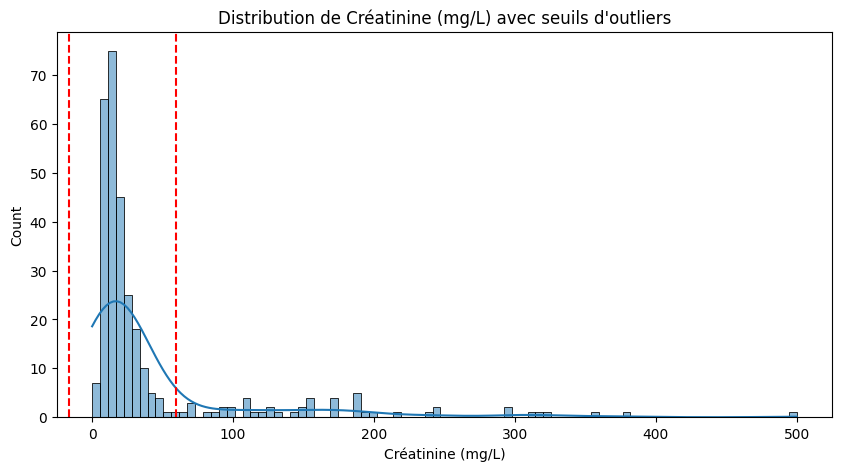


Variable: Na^+ (meq/L)
Valeurs aberrantes d√©tect√©es: 24
Plage normale: [131.00, 147.00]
Exemples d'outliers:
    Na^+ (meq/L)
5          130.0
9          123.0
11         117.0
15         114.0
17         129.0


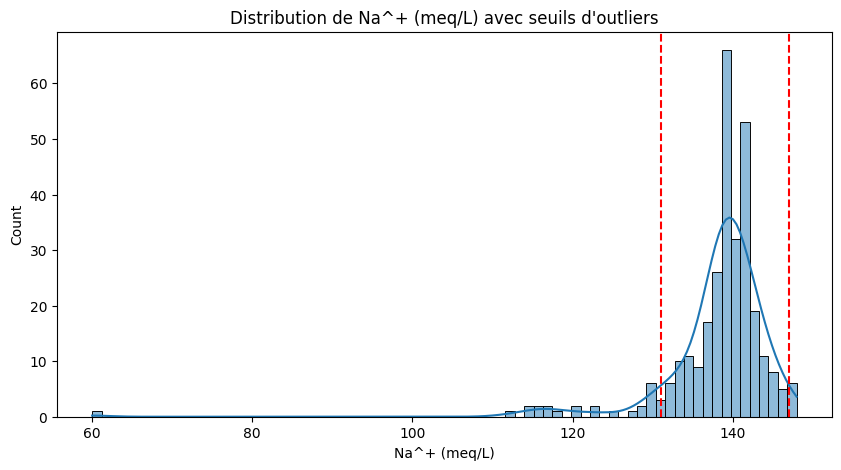


Variable: K^+ (meq/L)
Valeurs aberrantes d√©tect√©es: 10
Plage normale: [1.50, 5.50]
Exemples d'outliers:
    K^+ (meq/L)
0           6.0
10          6.0
15          1.0
35          6.0
47         36.0


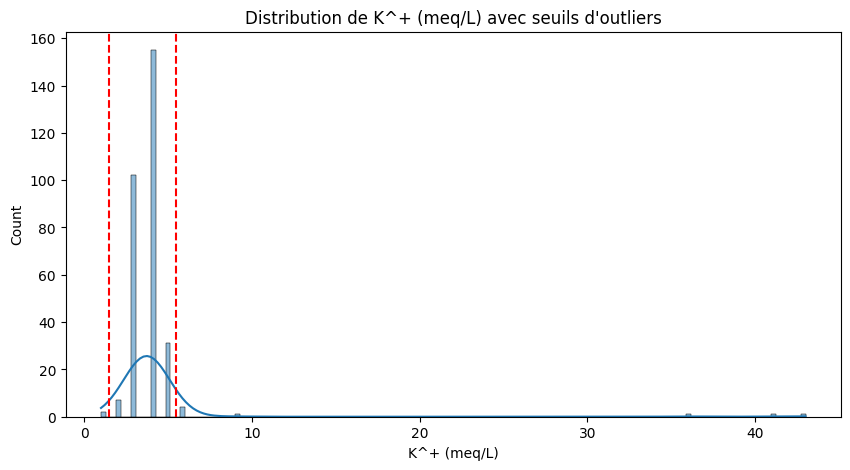


Variable: Ca^2+ (meq/L)
Valeurs aberrantes d√©tect√©es: 17
Plage normale: [76.00, 108.00]
Exemples d'outliers:
    Ca^2+ (meq/L)
6            72.0
14           73.0
15           70.0
25           62.0
34            4.0


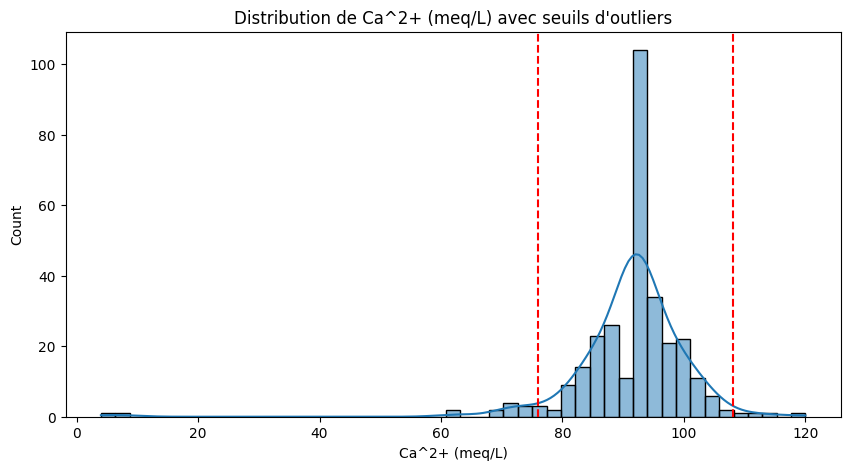


Variable: Cl^- (meq/L)
Valeurs aberrantes d√©tect√©es: 22
Plage normale: [92.50, 112.50]
Exemples d'outliers:
    Cl^- (meq/L)
9           87.0
10         115.0
11          86.0
15          76.0
17          92.0


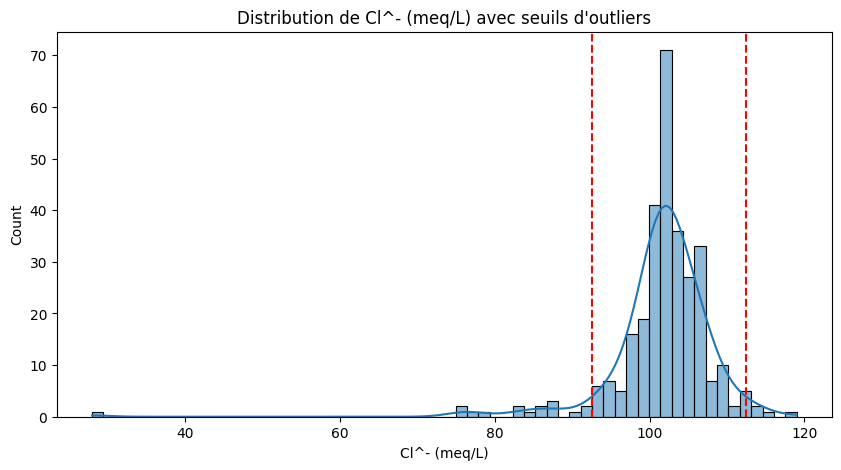


Variable: P (meq/L)
Valeurs aberrantes d√©tect√©es: 130
Plage normale: [38.50, 38.50]
Exemples d'outliers:
   P (meq/L)
0       43.0
3       94.0
7       50.0
8       55.0
9       39.0


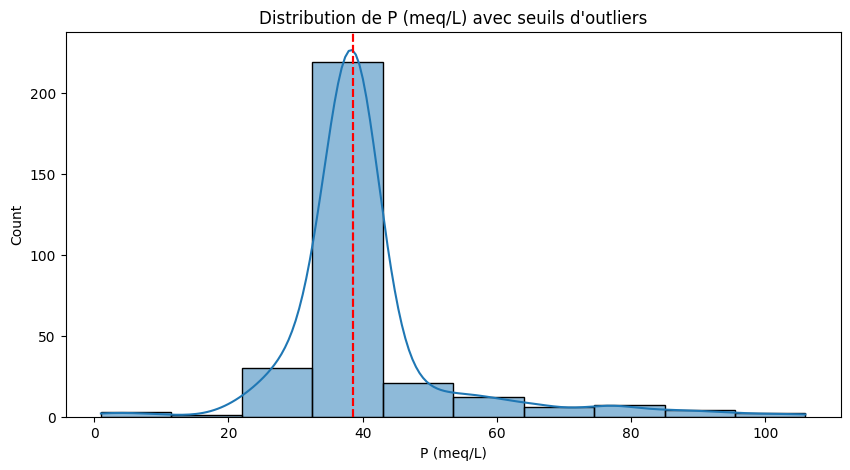


Variable: Hb (g/dL)
Valeurs aberrantes d√©tect√©es: 11
Plage normale: [4.50, 16.50]
Exemples d'outliers:
    Hb (g/dL)
27        4.0
30        4.0
36        3.0
42        3.0
93      111.0


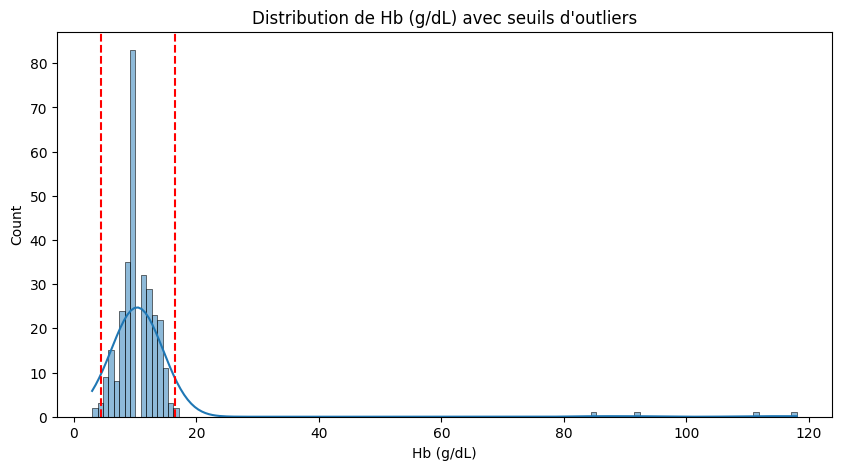


Variable: Hte (%)
Valeurs aberrantes d√©tect√©es: 97
Plage normale: [28.00, 28.00]
Exemples d'outliers:
   Hte (%)
0     32.0
1     30.0
3     24.0
6     34.0
8     27.0


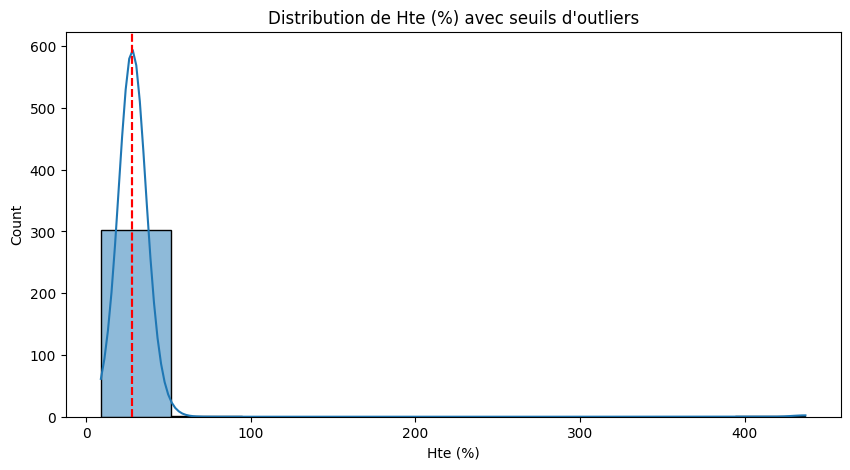


Variable: VGM (fL)
Valeurs aberrantes d√©tect√©es: 103
Plage normale: [77.00, 85.00]
Exemples d'outliers:
   VGM (fL)
0      88.0
1      74.0
3      95.0
4      69.0
6      69.0


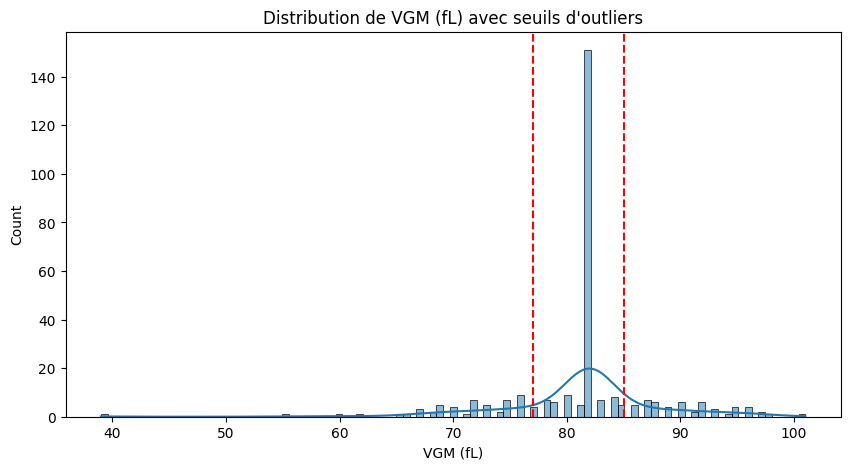


Variable: TCMH (pg)
Valeurs aberrantes d√©tect√©es: 89
Plage normale: [27.00, 27.00]
Exemples d'outliers:
   TCMH (pg)
0       31.0
1       23.0
3       32.0
4       22.0
6       25.0


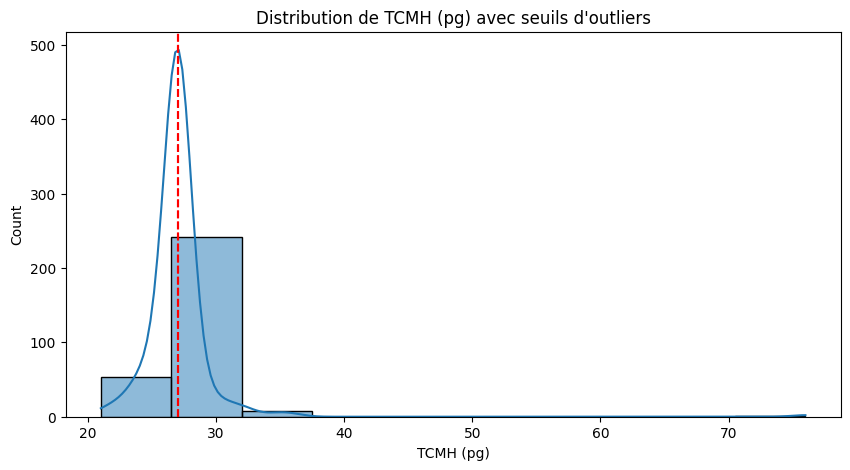


Variable: CCMH (%)
Valeurs aberrantes d√©tect√©es: 139
Plage normale: [32.50, 32.50]
Exemples d'outliers:
   CCMH (%)
0      35.0
1      31.0
2      34.0
3      33.0
4      32.0


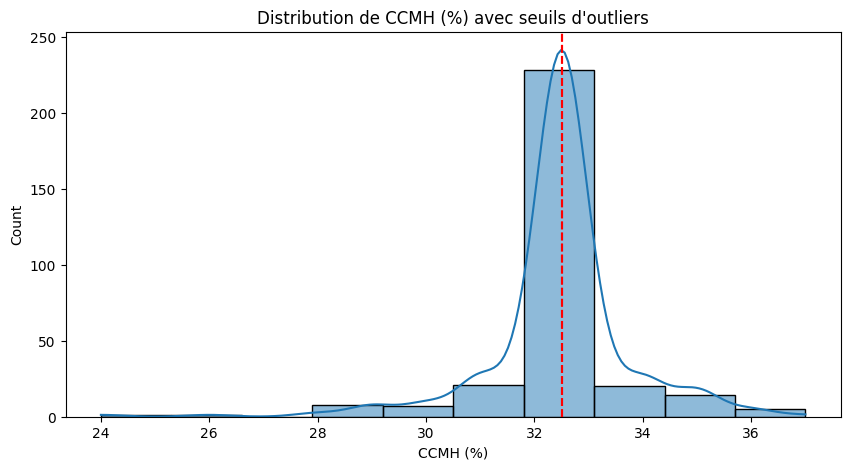


Variable: Plaquettes (g/L)
Valeurs aberrantes d√©tect√©es: 50
Plage normale: [135.50, 347.50]
Exemples d'outliers:
    Plaquettes (g/L)
1              421.0
8               97.0
11             529.0
16             113.0
22             121.0


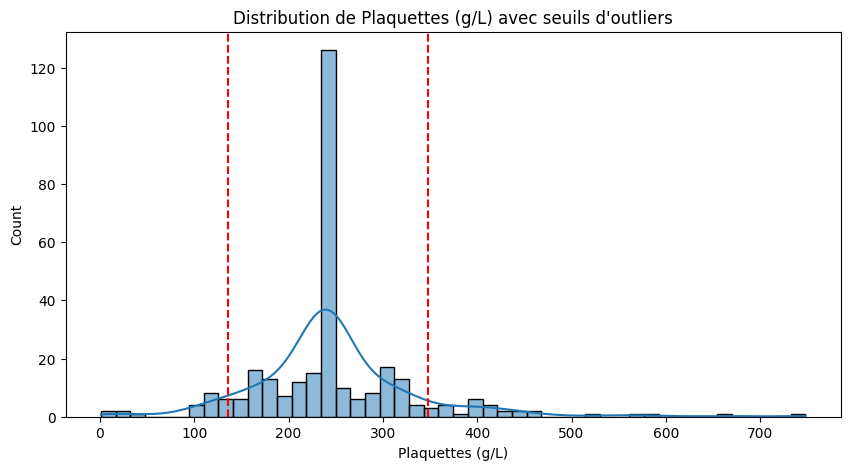


Variable: Poul (bpm)
Valeurs aberrantes d√©tect√©es: 24
Plage normale: [55.00, 111.00]
Exemples d'outliers:
    Poul (bpm)
2         19.0
9        114.0
15        51.0
24       120.0
27       121.0


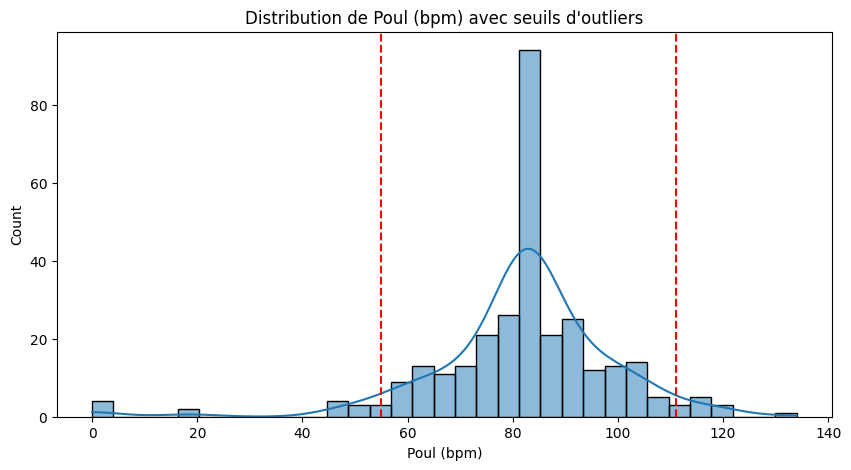


Variable: Poids (Kg)
Valeurs aberrantes d√©tect√©es: 63
Plage normale: [58.00, 90.00]
Exemples d'outliers:
    Poids (Kg)
13        55.0
14        50.0
28        55.0
32        53.0
44        48.0


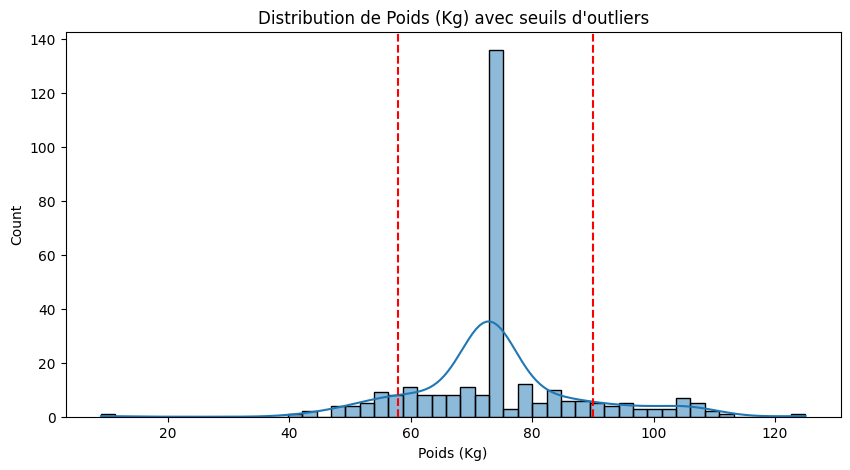


Variable: Personnels M√©dicaux/IRC
Valeurs aberrantes d√©tect√©es: 29
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Personnels M√©dicaux/IRC
0                         1
2                         1
4                         1
7                         1
10                        1


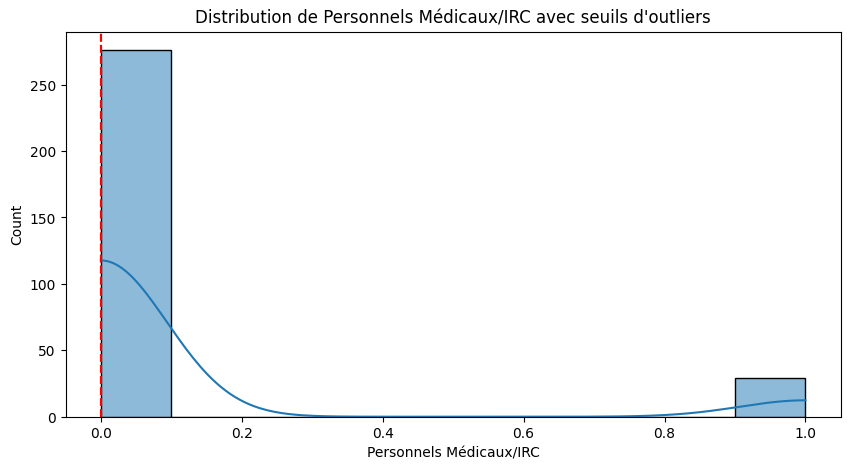


Variable: Personnels M√©dicaux/HTA
Valeurs aberrantes d√©tect√©es: 66
Plage normale: [1.00, 1.00]
Exemples d'outliers:
    Personnels M√©dicaux/HTA
1                         0
3                         0
7                         0
13                        0
14                        0


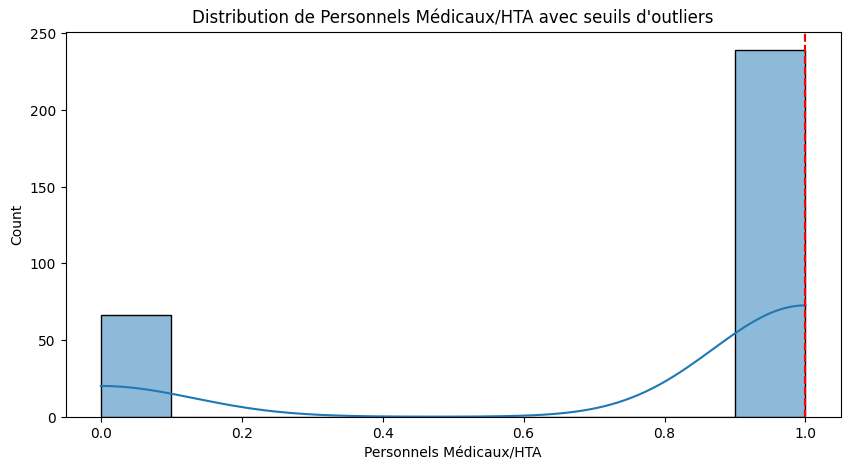


Variable: Personnels M√©dicaux/Diab√®te 1
Valeurs aberrantes d√©tect√©es: 5
Plage normale: [0.00, 0.00]
Exemples d'outliers:
     Personnels M√©dicaux/Diab√®te 1
54                               1
55                               1
77                               1
215                              1
216                              1


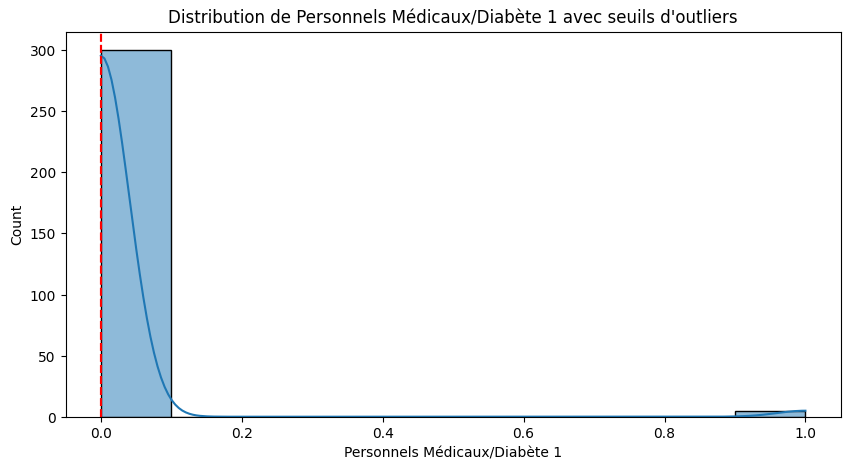


Variable: Personnels M√©dicaux/Pathologies virales (HB, HC, HIV)
Valeurs aberrantes d√©tect√©es: 18
Plage normale: [0.00, 0.00]
Exemples d'outliers:
    Personnels M√©dicaux/Pathologies virales (HB, HC, HIV)
10                                                  1    
34                                                  1    
42                                                  1    
57                                                  1    
75                                                  1    


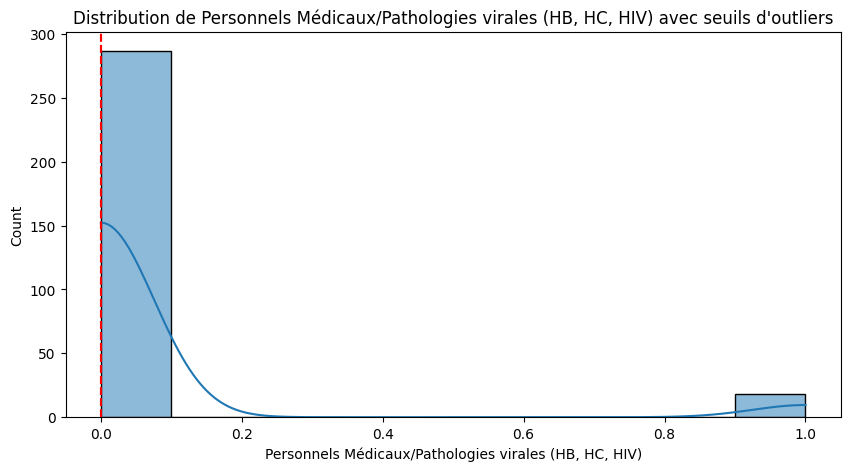

In [232]:
for col in numeric_cols:
    # Calcul des limites statistiques
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    # D√©tection des outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    
    if not outliers.empty:
        print(f"\nVariable: {col}")
        print(f"Valeurs aberrantes d√©tect√©es: {len(outliers)}")
        print(f"Plage normale: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print("Exemples d'outliers:")
        print(outliers[[col]].head())
        
        # Histogramme avec seuils
        plt.figure(figsize=(10, 5))
        sns.histplot(df_clean[col], kde=True)
        plt.axvline(lower_bound, color='r', linestyle='--')
        plt.axvline(upper_bound, color='r', linestyle='--')
        plt.title(f"Distribution de {col} avec seuils d'outliers")
        plt.show()

In [233]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 305
Data columns (total 47 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Contour r√©gulier/Rein gauche                           305 non-null    object 
 1   Contour r√©gulier/Rein droit                            305 non-null    object 
 2   Calcul R√©nal                                           305 non-null    object 
 3   Kyste                                                  305 non-null    object 
 4   Diff√©renciation des reins                              305 non-null    object 
 5   Echog√©nicit√©                                           305 non-null    object 
 6   Personnels M√©dicaux/Diab√®te 1                          305 non-null    int64  
 7   Personnels M√©dicaux/Diab√®te 2                          305 non-null    int64  
 8   Personnels Familiaux/Diab√®te                

In [241]:
# Enregistrer le DataFrame df_clean dans un fichier CSV
df_clean.to_csv("D:/Hackathon_IFRI_IA_G_8/data/processed/df_clean.csv", index=False, encoding='utf-8')
print("Le DataFrame df_clean a √©t√© enregistr√© au format CSV sous le nom 'df_clean.csv'.")

# Enregistrer le DataFrame df_clean dans un fichier Excel
with pd.ExcelWriter("D:/Hackathon_IFRI_IA_G_8/data/processed/df_clean.xlsx", engine='openpyxl') as writer:
    df_clean.to_excel(writer, index=False)
print("Le DataFrame df_clean a √©t√© enregistr√© au format Excel sous le nom 'df_clean.xlsx'.")

Le DataFrame df_clean a √©t√© enregistr√© au format CSV sous le nom 'df_clean.csv'.
Le DataFrame df_clean a √©t√© enregistr√© au format Excel sous le nom 'df_clean.xlsx'.


In [247]:
# Cr√©er un script qui permet de cr√©er de nouvelle ligne dans le fichier CSV avec la methode SMOTE 
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Charger le DataFrame nettoy√©
df_clean_2 = pd.read_csv("D:/Hackathon_IFRI_IA_G_8/data/processed/df_clean.csv")
# S√©parer les caract√©ristiques et la cible
X = df_clean_2.drop(columns=["stade_irc"])
y = df_clean_2["stade_irc"]
# Diviser les donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Encodage des variables cat√©gorielles
categorical_cols = X.select_dtypes(include=["object"]).columns
encoder = ColumnTransformer([("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)], remainder="passthrough")
X_encoded = encoder.fit_transform(X_train)
print(X_encoded.shape)  # devrait avoir le m√™me nombre de lignes que y_train
print(y_train.shape)
# Appliquer SMOTE pour √©quilibrer les classes dans l'ensemble d'entra√Ænement
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_train)
# Cr√©er un DataFrame avec les nouvelles donn√©es g√©n√©r√©es
# R√©cup√©rer les noms des colonnes apr√®s transformation
onehot_feature_names = encoder.named_transformers_['cat'].get_feature_names_out(categorical_cols)
numeric_feature_names = [col for col in X_train.columns if col not in categorical_cols]
columns_final = list(onehot_feature_names) + numeric_feature_names

# Cr√©er le DataFrame final
df_resampled = pd.DataFrame(X_resampled, columns=columns_final)
df_resampled["stade_irc"] = y_resampled
# Enregistrer le DataFrame avec les nouvelles lignes dans un fichier CSV
df_resampled.to_csv("D:/Hackathon_IFRI_IA_G_8/data/processed/df_resampled.csv", index=False, encoding='utf-8')
print("Le DataFrame avec les nouvelles lignes g√©n√©r√©es par SMOTE a √©t√© enregistr√© au format CSV sous le nom 'df_resampled.csv'.")




(244, 52)
(244,)
Le DataFrame avec les nouvelles lignes g√©n√©r√©es par SMOTE a √©t√© enregistr√© au format CSV sous le nom 'df_resampled.csv'.


In [248]:
df_resampled.head(30)

contour_regulier_rein_gauche_Oui  contour_regulier_rein_droit_Non  \
0                                1.0                              0.0   
1                                1.0                              0.0   
2                                1.0                              0.0   
3                                1.0                              0.0   
4                                1.0                              0.0   
5                                1.0                              0.0   
6                                1.0                              0.0   
7                                1.0                              0.0   
8                                1.0                              0.0   
9                                1.0                              0.0   
10                               1.0                              0.0   
11                               1.0                              0.0   
12                               1.0                              0.0   
13                               1.0                              0.0   
14                               1.0                              0.0   
15                               1.0                              0.0   
16                               1.0                              0.0   
17                               1.0                              0.0   
18                               1.0                              0.0   
19                               1.0                              0.0   
20                               1.0                              0.0   
21                               1.0                              0.0   
22                               1.0                              0.0   
23                               1.0                              0.0   
24                               1.0                              0.0   
25                               1.0                              0.0   
26                               1.0                              0.0   
27                               1.0                              0.0   
28                               1.0                              0.0   
29                               1.0                              0.0   

    contour_regulier_rein_droit_Oui  calcul_renal_Non  calcul_renal_Oui  \
0                               1.0               1.0               0.0   
1                               1.0               1.0               0.0   
2                               1.0               1.0               0.0   
3                               1.0               1.0               0.0   
4                               1.0               1.0               0.0   
5                               1.0               1.0               0.0   
6                               1.0               1.0               0.0   
7                               1.0               1.0               0.0   
8                               1.0               1.0               0.0   
9                               1.0               1.0               0.0   
10                              1.0               1.0               0.0   
11                              1.0               1.0               0.0   
12                              1.0               1.0               0.0   
13                              1.0               1.0               0.0   
14                              1.0               1.0               0.0   
15                              1.0               1.0               0.0   
16                              1.0               1.0               0.0   
17                              1.0               1.0               0.0   
18                              1.0               1.0               0.0   
19                              1.0               1.0               0.0   
20                              1.0               1.0               0.0   
21                              1.0               1.0               0.0   
22             

In [175]:
df_resampled.columns

Index(['contour_regulier_rein_gauche_Oui', 'contour_regulier_rein_droit_Non',
       'contour_regulier_rein_droit_Oui', 'calcul_renal_Non',
       'calcul_renal_Oui', 'kyste_Non', 'kyste_Oui',
       'differenciation_des_reins_Bien diff√©renci√©s',
       'differenciation_des_reins_Perte de diff√©renciation',
       'echogenicite_Homog√©n√©it√©', 'echogenicite_Hyper Echog√©nicit√©',
       'personnels_medicaux_diabete_1', 'personnels_medicaux_diabete_2',
       'personnels_familiaux_diabete', 'duree_diabete_2_mois',
       'pathologies_retinopathie_diabetique',
       'causes_majeure_apres_diagnostic_diabete', 'personnels_medicaux_hta',
       'personnels_familiaux_hta', 'duree_hta_mois',
       'pathologies_retinopathie_hypertensive',
       'causes_majeure_apres_diagnostic_hta', 'pathologies_glaucome',
       'personnels_medicaux_pathologies_virales_hb_hc_hiv',
       'enquete_sociale_phytotherapie_traditionnelle',
       'enquete_sociale_pec_oui', 'enquete_sociale_pec_non', 'creatin

In [243]:
def traiter_valeurs_aberrantes(df, colonnes):
    for col in colonnes:
        if col in df.columns:
            # Calcul des limites statistiques
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Remplacer les valeurs aberrantes par la m√©diane de l'intervalle normal
            median_val = df[col].median()
            df[col] = df[col].apply(lambda x: median_val if x < lower_bound or x > upper_bound else x)

    return df

# Exemple d'utilisation
colonnes_numeriques = df_clean.select_dtypes(include=['number']).columns
df_clean = traiter_valeurs_aberrantes(df_clean, colonnes_numeriques)

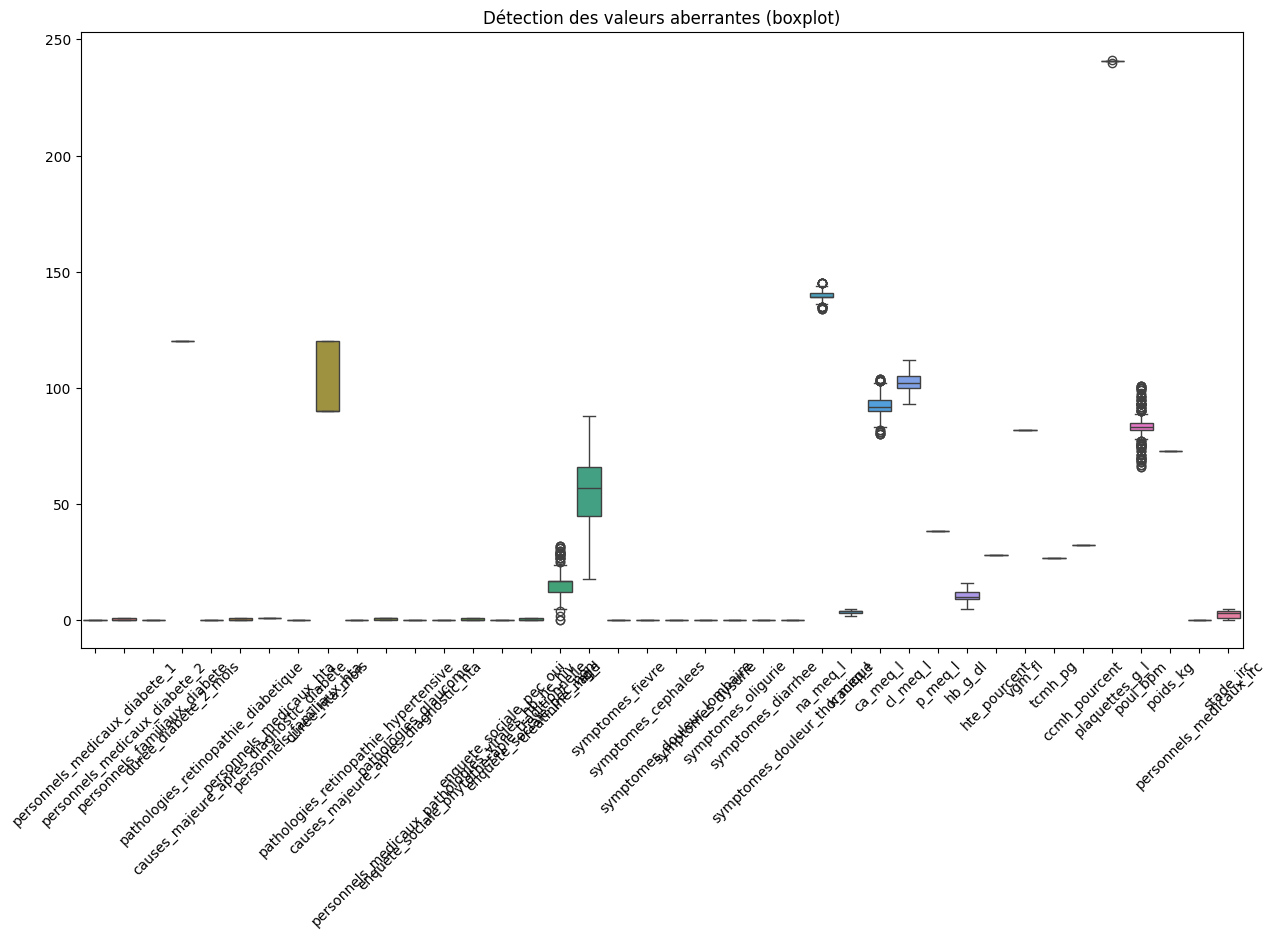

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# S√©lection des colonnes num√©riques
numeric_cols = df_clean.select_dtypes(include=['number']).columns

# Visualisation des outliers avec boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_clean[numeric_cols])
plt.xticks(rotation=45)
plt.title("D√©tection des valeurs aberrantes (boxplot)")
plt.show()


Variable: creatinine_mg_l
Valeurs aberrantes d√©tect√©es: 33
Plage normale: [4.50, 24.50]
Exemples d'outliers:
    creatinine_mg_l
26             26.0
28              0.0
56             29.0
80              4.0
85             28.0


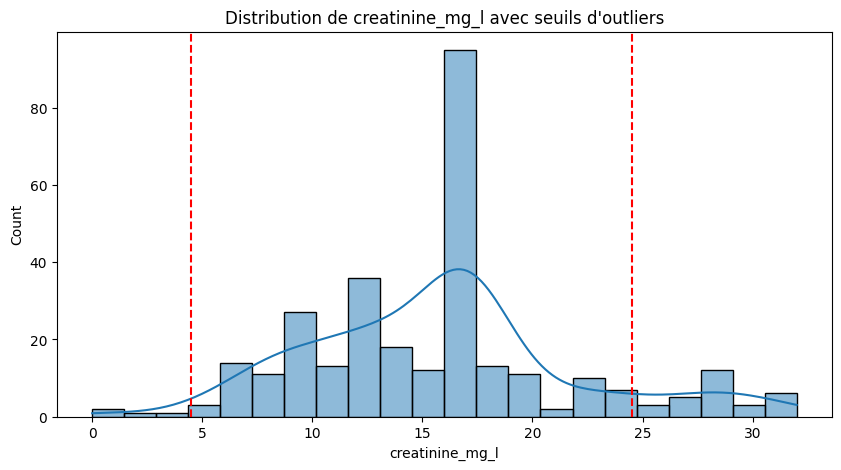


Variable: na_meq_l
Valeurs aberrantes d√©tect√©es: 19
Plage normale: [136.00, 144.00]
Exemples d'outliers:
    na_meq_l
1      134.0
16     135.0
25     135.0
42     135.0
48     135.0


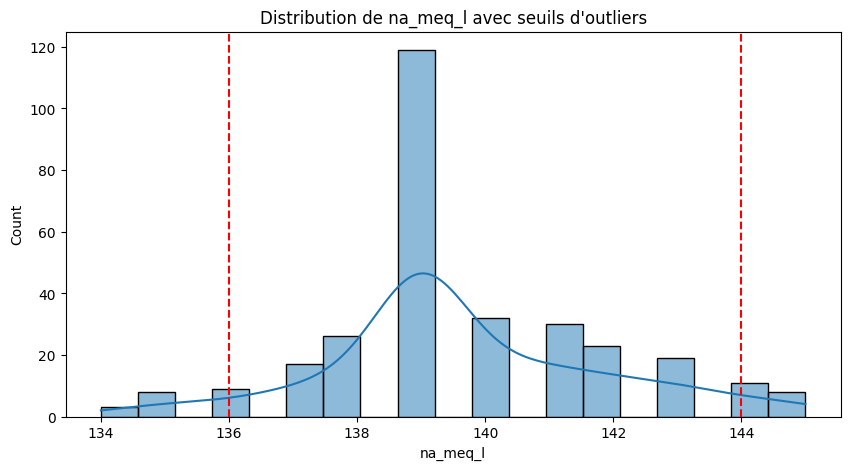


Variable: ca_meq_l
Valeurs aberrantes d√©tect√©es: 20
Plage normale: [82.50, 102.50]
Exemples d'outliers:
    ca_meq_l
0       82.0
17      81.0
21     103.0
29      81.0
41      80.0


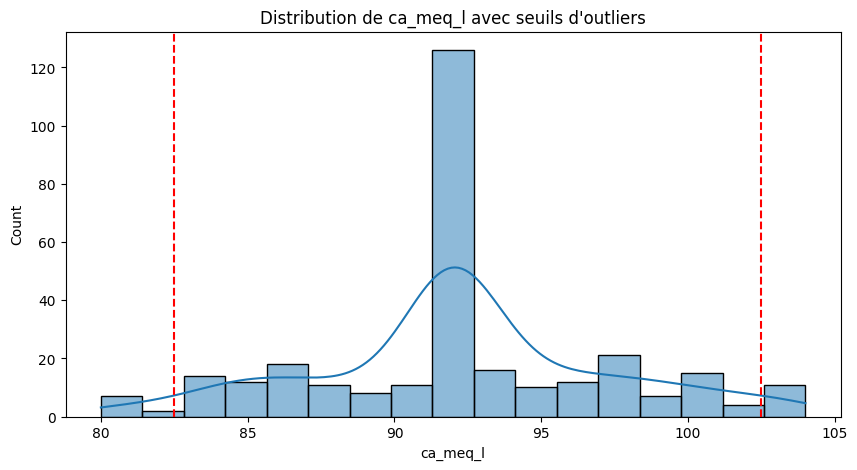


Variable: plaquettes_g_l
Valeurs aberrantes d√©tect√©es: 2
Plage normale: [240.50, 240.50]
Exemples d'outliers:
     plaquettes_g_l
87            241.0
191           240.0


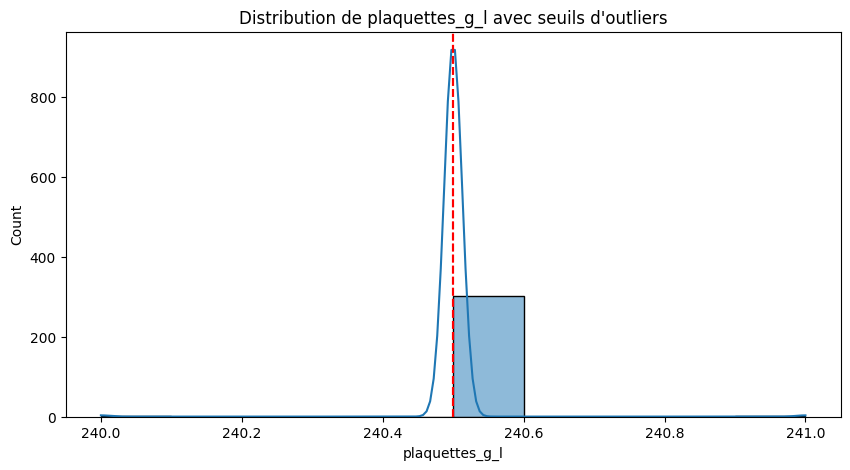


Variable: poul_bpm
Valeurs aberrantes d√©tect√©es: 95
Plage normale: [77.50, 89.50]
Exemples d'outliers:
    poul_bpm
4       69.0
5       70.0
6       67.0
10      97.0
11     100.0


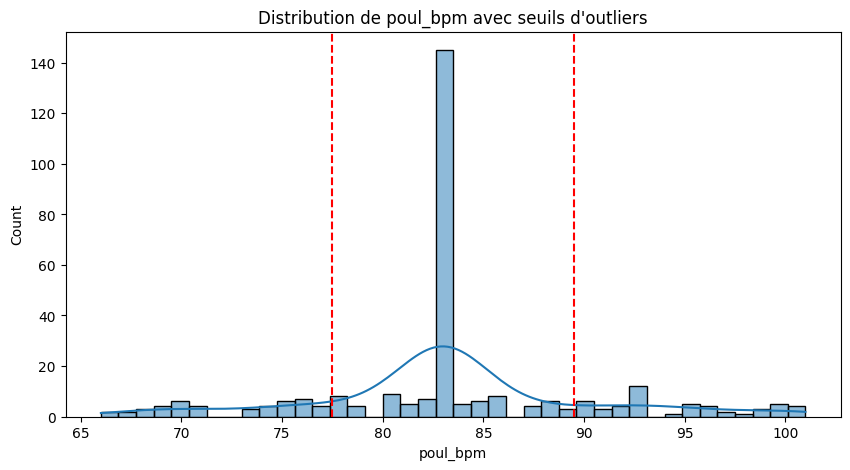

In [245]:
for col in numeric_cols:
    # Calcul des limites statistiques
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    # D√©tection des outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    
    if not outliers.empty:
        print(f"\nVariable: {col}")
        print(f"Valeurs aberrantes d√©tect√©es: {len(outliers)}")
        print(f"Plage normale: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print("Exemples d'outliers:")
        print(outliers[[col]].head())
        
        # Histogramme avec seuils
        plt.figure(figsize=(10, 5))
        sns.histplot(df_clean[col], kde=True)
        plt.axvline(lower_bound, color='r', linestyle='--')
        plt.axvline(upper_bound, color='r', linestyle='--')
        plt.title(f"Distribution de {col} avec seuils d'outliers")
        plt.show()

## Renommage des variables du df_clean

In [234]:
print("Colonnes avant renommage :", df_clean.columns.tolist())
df_clean.columns = df_clean.columns.str.strip()  # Enlever les espaces en d√©but et fin de nom de colonne

df_clean.columns

Colonnes avant renommage : ['Contour r√©gulier/Rein gauche', 'Contour r√©gulier/Rein droit', 'Calcul R√©nal', 'Kyste', 'Diff√©renciation des reins', 'Echog√©nicit√©', 'Personnels M√©dicaux/Diab√®te 1', 'Personnels M√©dicaux/Diab√®te 2', 'Personnels Familiaux/Diab√®te', 'Dur√©e Diab√®te 2 (mois)', 'Pathologies/R√©tinopathie diab√©tique', 'Causes Majeure apr√®s Diagnostic/Diab√®te', 'Personnels M√©dicaux/HTA', 'Personnels Familiaux/HTA', 'Dur√©e HTA (mois)', 'Pathologies/R√©tinopathie hypertensive', 'Causes Majeure apr√®s Diagnostic/HTA', 'Pathologies/Glaucome', 'Personnels M√©dicaux/Pathologies virales (HB, HC, HIV)', 'Enqu√™te Sociale/Phytoth√©rapie traditionnelle', 'Enqu√™te Sociale/PEC oui', 'Enqu√™te Sociale/PEC non', 'Cr√©atinine (mg/L)', 'Age', 'Sexe', 'Sympt√¥mes/Fi√®vre', 'Sympt√¥mes/C√©phal√©es', 'Sympt√¥mes/Douleur Lombaire', 'Sympt√¥mes/Dysurie', 'Sympt√¥mes/Oligurie', 'Sympt√¥mes/Diarrh√©e', 'Sympt√¥mes/Douleur Thoracique', 'Na^+ (meq/L)', 'K^+ (meq/L)', 'Ca^2+ (meq/L)', 'Cl

Index(['Contour r√©gulier/Rein gauche', 'Contour r√©gulier/Rein droit',
       'Calcul R√©nal', 'Kyste', 'Diff√©renciation des reins', 'Echog√©nicit√©',
       'Personnels M√©dicaux/Diab√®te 1', 'Personnels M√©dicaux/Diab√®te 2',
       'Personnels Familiaux/Diab√®te', 'Dur√©e Diab√®te 2 (mois)',
       'Pathologies/R√©tinopathie diab√©tique',
       'Causes Majeure apr√®s Diagnostic/Diab√®te', 'Personnels M√©dicaux/HTA',
       'Personnels Familiaux/HTA', 'Dur√©e HTA (mois)',
       'Pathologies/R√©tinopathie hypertensive',
       'Causes Majeure apr√®s Diagnostic/HTA', 'Pathologies/Glaucome',
       'Personnels M√©dicaux/Pathologies virales (HB, HC, HIV)',
       'Enqu√™te Sociale/Phytoth√©rapie traditionnelle',
       'Enqu√™te Sociale/PEC oui', 'Enqu√™te Sociale/PEC non',
       'Cr√©atinine (mg/L)', 'Age', 'Sexe', 'Sympt√¥mes/Fi√®vre',
       'Sympt√¥mes/C√©phal√©es', 'Sympt√¥mes/Douleur Lombaire',
       'Sympt√¥mes/Dysurie', 'Sympt√¥mes/Oligurie', 'Sympt√¥mes/Diarrh√©e',
       

In [235]:
# Renommer les colonnes pour √©viter les espaces et les caract√®res sp√©ciaux
rename_dict = {
    "Contour r√©gulier/Rein gauche": "contour_regulier_rein_gauche",
    "Contour r√©gulier/Rein droit": "contour_regulier_rein_droit",
    "Calcul R√©nal": "calcul_renal",
    "Kyste": "kyste",
    "Diff√©renciation des reins": "differenciation_des_reins",
    "Echog√©nicit√©": "echogenicite",
    "Personnels M√©dicaux/Diab√®te 1": "personnels_medicaux_diabete_1",
    "Personnels M√©dicaux/Diab√®te 2": "personnels_medicaux_diabete_2",
    "Personnels Familiaux/Diab√®te": "personnels_familiaux_diabete",
    "Dur√©e Diab√®te 2 (mois)": "duree_diabete_2_mois",
    "Pathologies/R√©tinopathie diab√©tique": "pathologies_retinopathie_diabetique",
    "Causes Majeure apr√®s Diagnostic/Diab√®te": "causes_majeure_apres_diagnostic_diabete",
    "Personnels M√©dicaux/HTA": "personnels_medicaux_hta",
    "Personnels Familiaux/HTA": "personnels_familiaux_hta",
    "Dur√©e HTA (mois)": "duree_hta_mois",
    "Pathologies/R√©tinopathie hypertensive": "pathologies_retinopathie_hypertensive",
    "Causes Majeure apr√®s Diagnostic/HTA": "causes_majeure_apres_diagnostic_hta",
    "Pathologies/Glaucome": "pathologies_glaucome",
    "Personnels M√©dicaux/Pathologies virales (HB, HC, HIV)": "personnels_medicaux_pathologies_virales_hb_hc_hiv",
    "Enqu√™te Sociale/Phytoth√©rapie traditionnelle": "enquete_sociale_phytotherapie_traditionnelle",
    "Enqu√™te Sociale/PEC oui": "enquete_sociale_pec_oui",
    "Enqu√™te Sociale/PEC non": "enquete_sociale_pec_non",
    "Cr√©atinine (mg/L)": "creatinine_mg_l",
    "Age": "age",
    "Sexe": "sexe",
    "Sympt√¥mes/Fi√®vre": "symptomes_fievre",
    "Sympt√¥mes/C√©phal√©es": "symptomes_cephalees",
    "Sympt√¥mes/Douleur Lombaire": "symptomes_douleur_lombaire",
    "Sympt√¥mes/Dysurie": "symptomes_dysurie",
    "Sympt√¥mes/Oligurie": "symptomes_oligurie",
    "Sympt√¥mes/Diarrh√©e": "symptomes_diarrhee",
    "Sympt√¥mes/Douleur Thoracique": "symptomes_douleur_thoracique",
    "Na^+ (meq/L)": "na_meq_l",
    "K^+ (meq/L)": "k_meq_l",
    "Ca^2+ (meq/L)": "ca_meq_l",
    "Cl^- (meq/L)": "cl_meq_l",
    "P (meq/L)": "p_meq_l",
    "Hb (g/dL)": "hb_g_dl",
    "Hte (%)": "hte_pourcent",
    "VGM (fL)": "vgm_fl",
    "TCMH (pg)": "tcmh_pg",
    "CCMH (%)": "ccmh_pourcent",
    "Plaquettes (g/L)": "plaquettes_g_l",
    "Poul (bpm)": "poul_bpm",
    "Poids (Kg)": "poids_kg",
    "Personnels M√©dicaux/IRC": "personnels_medicaux_irc",
    "Stage de l'IRC": "stade_irc",
}
# Appliquer le renommage
df_clean.rename(columns=rename_dict, inplace=True)

In [236]:
df_clean.columns

Index(['contour_regulier_rein_gauche', 'contour_regulier_rein_droit',
       'calcul_renal', 'kyste', 'differenciation_des_reins', 'echogenicite',
       'personnels_medicaux_diabete_1', 'personnels_medicaux_diabete_2',
       'personnels_familiaux_diabete', 'duree_diabete_2_mois',
       'pathologies_retinopathie_diabetique',
       'causes_majeure_apres_diagnostic_diabete', 'personnels_medicaux_hta',
       'personnels_familiaux_hta', 'duree_hta_mois',
       'pathologies_retinopathie_hypertensive',
       'causes_majeure_apres_diagnostic_hta', 'pathologies_glaucome',
       'personnels_medicaux_pathologies_virales_hb_hc_hiv',
       'enquete_sociale_phytotherapie_traditionnelle',
       'enquete_sociale_pec_oui', 'enquete_sociale_pec_non', 'creatinine_mg_l',
       'age', 'sexe', 'symptomes_fievre', 'symptomes_cephalees',
       'symptomes_douleur_lombaire', 'symptomes_dysurie', 'symptomes_oligurie',
       'symptomes_diarrhee', 'symptomes_douleur_thoracique', 'na_meq_l',
       'k_

In [240]:
df_clean["sexe"].dtype

dtype('O')

In [159]:
df_clean["stade_irc"].unique()

array([5., 1., 4., 2., 0., 3.])

In [64]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 305
Data columns (total 46 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   contour_regulier_rein_gauche                       305 non-null    object 
 1   contour_regulier_rein_droit                        305 non-null    object 
 2   calcul_renal                                       305 non-null    object 
 3   kyste                                              305 non-null    object 
 4   differenciation_des_reins                          305 non-null    object 
 5   echogenicite                                       305 non-null    object 
 6   personnels_medicaux_diabete_1                      305 non-null    int64  
 7   personnels_medicaux_diabete_2                      305 non-null    int64  
 8   personnels_familiaux_diabete                       305 non-null    int64  
 9   duree_diabete_2

In [246]:
# Enregistrer le DataFrame df_clean dans un fichier CSV
df_clean.to_csv("D:/Hackathon_IFRI_IA_G_8/data/processed/df_clean_1.csv", index=False, encoding='utf-8')
print("Le DataFrame df_clean a √©t√© enregistr√© au format CSV sous le nom 'df_clean_1.csv'.")

# Enregistrer le DataFrame df_clean dans un fichier Excel
with pd.ExcelWriter("D:/Hackathon_IFRI_IA_G_8/data/processed/df_clean_1.xlsx", engine='openpyxl') as writer:
    df_clean.to_excel(writer, index=False)
print("Le DataFrame df_clean a √©t√© enregistr√© au format Excel sous le nom 'df_clean_1.xlsx'.")

Le DataFrame df_clean a √©t√© enregistr√© au format CSV sous le nom 'df_clean_1.csv'.
Le DataFrame df_clean a √©t√© enregistr√© au format Excel sous le nom 'df_clean_1.xlsx'.


In [49]:
df_clean_1 = df_clean

In [50]:
df_clean["Stage de l\'IRC"].unique()

array([5., 1., 4., 2., 0., 3.])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 305
Data columns (total 59 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Contour r√©gulier/Rein gauche                           130 non-null    object 
 1   Contour r√©gulier/Rein droit                            130 non-null    object 
 2   Calcul R√©nal                                           130 non-null    object 
 3   Kyste                                                  130 non-null    object 
 4   Diff√©renciation des reins                              130 non-null    object 
 5   Echog√©nicit√©                                           130 non-null    object 
 6   Contour r√©gulier/Rein droit                            130 non-null    object 
 7   Contour r√©gulier/Rein gauche                           130 non-null    object 
 8   Personnels M√©dicaux/Diab√®te 1                

In [ ]:
# Lister toutes les colonnes de df_clean_1
variables = df_clean.columns.tolist()

# Afficher les colonnes
print("Liste des variables dans df_clean_1 :")
print(variables)
print(len(variables))

Liste des variables dans df_clean_1 :
['Contour r√©gulier/Rein gauche', 'Contour r√©gulier/Rein droit', 'Calcul R√©nal', 'Kyste', 'Diff√©renciation des reins', 'Echog√©nicit√©', 'Personnels M√©dicaux/Diab√®te 1', 'Personnels M√©dicaux/Diab√®te 2', 'Personnels Familiaux/Diab√®te', 'Dur√©e Diab√®te 2 (mois)', 'Pathologies/R√©tinopathie diab√©tique', 'Causes Majeure apr√®s Diagnostic/Diab√®te', 'Personnels M√©dicaux/HTA', 'Personnels Familiaux/HTA', 'Dur√©e HTA (mois)', 'Pathologies/R√©tinopathie hypertensive', 'Causes Majeure apr√®s Diagnostic/HTA', 'Pathologies/Glaucome', 'Personnels M√©dicaux/Pathologies virales (HB, HC, HIV)', 'Enqu√™te Sociale/Phytoth√©rapie traditionnelle', 'Enqu√™te Sociale/PEC oui', 'Enqu√™te Sociale/PEC non', 'Cr√©atinine (mg/L)', 'Age', 'Sympt√¥mes/Fi√®vre', 'Sympt√¥mes/C√©phal√©es', 'Sympt√¥mes/Douleur Lombaire', 'Sympt√¥mes/Dysurie', 'Sympt√¥mes/Oligurie', 'Sympt√¥mes/Diarrh√©e', 'Sympt√¥mes/Douleur Thoracique', 'Na^+ (meq/L)', 'K^+ (meq/L)', 'Ca^2+ (meq/L)', 

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 305
Data columns (total 46 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Contour r√©gulier/Rein gauche                           306 non-null    object 
 1   Contour r√©gulier/Rein droit                            306 non-null    object 
 2   Calcul R√©nal                                           306 non-null    object 
 3   Kyste                                                  306 non-null    object 
 4   Diff√©renciation des reins                              306 non-null    object 
 5   Echog√©nicit√©                                           306 non-null    object 
 6   Personnels M√©dicaux/Diab√®te 1                          306 non-null    int64  
 7   Personnels M√©dicaux/Diab√®te 2                          306 non-null    int64  
 8   Personnels Familiaux/Diab√®te                

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# S√©parer les caract√©ristiques (X) et la cible (y)
X = df_clean.drop(columns=["Stage de l'IRC"])  # Supprimer la colonne cible
y = df_clean["Stage de l'IRC"]  # Variable cible

# Identifier les colonnes cat√©gorielles
categorical_cols = X.select_dtypes(include=["object"]).columns

# Appliquer One-Hot Encoding aux variables cat√©gorielles
encoder = ColumnTransformer([("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)], remainder="passthrough")
X_encoded = encoder.fit_transform(X)

# Standardiser les donn√©es
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Diviser les donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Pr√©paration des donn√©es termin√©e.")

Pr√©paration des donn√©es termin√©e.


#### Entrainemant du modele Sans le PCA en utilisant le dataset df_clean

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Liste des mod√®les √† tester
models = {
    "Arbre de d√©cision": DecisionTreeClassifier(max_depth=6, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "R√©gression Logistique": LogisticRegression(max_iter=1000, random_state=42)
}

# Tester chaque mod√®le
for name, model1 in models.items():
    print(f"üîπ Mod√®le: {name}")
    
    # Entra√Æner le mod√®le
    model1.fit(X_train, y_train)
    
    # Faire des pr√©dictions
    y_pred = model1.predict(X_test)
     
    # Calculer la pr√©cision
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Pr√©cision: {accuracy:.4f}")
    
    # Afficher le rapport de classification
    print(classification_report(y_test, y_pred))
    print("-" * 50)

üîπ Mod√®le: Arbre de d√©cision
Pr√©cision: 0.6613
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         6
         1.0       0.78      0.54      0.64        13
         2.0       0.43      0.33      0.38         9
         3.0       0.67      0.50      0.57        16
         4.0       0.50      1.00      0.67         7
         5.0       1.00      0.91      0.95        11

    accuracy                           0.66        62
   macro avg       0.66      0.71      0.66        62
weighted avg       0.69      0.66      0.65        62

--------------------------------------------------
üîπ Mod√®le: Random Forest
Pr√©cision: 0.5968
              precision    recall  f1-score   support

         0.0       0.56      0.83      0.67         6
         1.0       0.67      0.46      0.55        13
         2.0       0.33      0.33      0.33         9
         3.0       0.67      0.38      0.48        16
         4.0       0.46      0.86   

#### Entrainement du model avec le PCA en utilisant le dataset df_clean

In [ ]:
from sklearn.metrics import accuracy_score

# Pr√©dictions sur les ensembles d'entra√Ænement et de test
train_preds = model.predict(X_train_pca)
test_preds = model.predict(X_test_pca)

# Calcul des pr√©cisions
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Accuracy sur Train: {train_acc:.2f}")
print(f"Accuracy sur Test: {test_acc:.2f}")

# V√©rification de l'√©cart
if train_acc - test_acc > 0.1:  # Plus de 10% de diff√©rence
    print("‚ö†Ô∏è Overfitting d√©tect√© !")


Accuracy sur Train: 0.88
Accuracy sur Test: 0.50
‚ö†Ô∏è Overfitting d√©tect√© !


In [251]:
# Identifier les colonnes en double
colonnes_doubles = df_clean.columns[df_clean.columns.duplicated()].tolist()

# Afficher les colonnes en double
print("Colonnes en double dans df_clean :")
print(colonnes_doubles)

Colonnes en double dans df_clean :
[]


In [252]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 305
Data columns (total 47 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   contour_regulier_rein_gauche                       305 non-null    object 
 1   contour_regulier_rein_droit                        305 non-null    object 
 2   calcul_renal                                       305 non-null    object 
 3   kyste                                              305 non-null    object 
 4   differenciation_des_reins                          305 non-null    object 
 5   echogenicite                                       305 non-null    object 
 6   personnels_medicaux_diabete_1                      305 non-null    float64
 7   personnels_medicaux_diabete_2                      305 non-null    int64  
 8   personnels_familiaux_diabete                       305 non-null    float64
 9   duree_diabete_2

## Visualisation des donn√©es apres gestion des valeurs manquantes

In [ ]:
# Enregistrer le dataset nettoy√© dans un fichier Excel
with pd.ExcelWriter("D:/Hackathon_IFRI_IA_G_8/data/processed/dataset_nettoye_3.xlsx", engine='openpyxl') as writer:
    df.to_excel(writer, index=False)
print("Le dataset nettoy√© a √©t√© enregistr√© sous le nom 'dataset_nettoye.xlsx'.")

Le dataset nettoy√© a √©t√© enregistr√© sous le nom 'dataset_nettoye.xlsx'.


In [253]:
df_1 = pd.read_csv("D:\Hackathon_IFRI_IA_G_8\data\processed\dataset_nettoye_3.csv")
df_1.head()

Sexe   Age Nationalit√© Profession (selon cat√©gorie professionnelle)  \
0    F  50.0   B√©ninoise                                      Artisan   
1    M  28.0   B√©ninoise                                      Artisan   
2    F  69.0   B√©ninoise                                Retriait√©(e)    
3    M  68.0   B√©ninoise                                 Entrepreneur   
4    F  68.0   B√©ninoise                                Retriait√©(e)    

  Adresse (D√©partement) Situation Matrimoniale  Motif(s) d'Admission/Asth√©nie  \
0              Littoral               Mari√©(e)                            1.0   
1                   Zou               Mari√©(e)                            1.0   
2            Atlantique               Mari√©(e)                            1.0   
3               Plateau               Mari√©(e)                            1.0   
4              Littoral               Mari√©(e)                            1.0   

   Motif(s) d'Admission/Alt√©ration de la fonction r√©nale  \
0                                                0.0       
1                                                1.0       
2                                                1.0       
3                                                0.0       
4                                                1.0       

   Motif(s) d'Admission/HTA  Motif(s) d'Admission/≈íd√®me  ...  \
0                       0.0                         0.0  ...   
1                       0.0                         0.0  ...   
2                       0.0                         0.0  ...   
3                       1.0                         1.0  ...   
4                       0.0                         0.0  ...   

   Contour r√©gulier/Rein gauche  Pathologies/R√©tinopathie hypertensive  \
0                           Oui                                    0.0   
1                           Oui                                    0.0   
2                           Oui                                    0.0   
3                           Oui                                    0.0   
4                           Oui                                    1.0   

   Pathologies/R√©tinopathie diab√©tique  Pathologies/Glaucome  \
0                                  0.0                   0.0   
1                                  0.0                   0.0   
2                                  0.0                   0.0   
3                                  0.0                   0.0   
4                                  0.0                   1.0   

   Rythme Cardiaque/Sinusal  Rythme Cardiaque/R√©gulier  \
0                       0.0                        Oui   
1                       0.0                        Oui   
2                       0.0                        Oui   
3                       0.0                        Oui   
4                       0.0                        Non   

   Trouble de la Repolarisation  Stage de l'IRC  \
0                           Non             5.0   
1                           Non             5.0   
2                           Non             5.0   
3                           Oui             5.0   
4                           Non             5.0   

   Causes Majeure apr√®s Diagnostic/HTA Causes Majeure apr√®s Diagnostic/Diab√®te  
0                                  0.0                                     0.0  
1                                  0.0                                     0.0  
2                                  0.0                                     0.0  
3                                  0.0                                     0.0  
4                                  1.0                                     0.0  

[5 rows x 171 columns]

In [254]:

# 1. S√©lection des colonnes quantitatives (num√©riques)
quantitative_cols = df_1.select_dtypes(include=['number']).columns
qualitative_cols = df_1.select_dtypes(exclude=['number']).columns


# 2. Remplacement par la m√©diane pour chaque colonne
for col in quantitative_cols:
    # Calcul de la m√©diane (ignore automatiquement les NaN)
    median_val = df_1[col].median()
    
    # Remplacement des valeurs manquantes
    df_1[col] = df_1[col].fillna(median_val)

for col in qualitative_cols:
    # Calcul du mode (en ignorant les NaN)
    mode_val = df_1[col].mode().iloc[0] if not df_1[col].mode().empty else "inconnu"
    
    # Remplacement des NaN
    df_1[col] = df_1[col].fillna(mode_val)

# V√©rification
print("Valeurs manquantes apr√®s remplacement :")
print(df_1.isna().sum())

Valeurs manquantes apr√®s remplacement :
Sexe                                            0
Age                                             0
Nationalit√©                                     0
Profession (selon cat√©gorie professionnelle)    0
Adresse (D√©partement)                           0
                                               ..
Rythme Cardiaque/R√©gulier                       0
Trouble de la Repolarisation                    0
Stage de l'IRC                                  0
Causes Majeure apr√®s Diagnostic/HTA             0
Causes Majeure apr√®s Diagnostic/Diab√®te         0
Length: 171, dtype: int64


In [255]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# S√©parer les caract√©ristiques (X) et la cible (y)
X = df_1.drop(columns=["Stage de l'IRC"])  # Supprimer la colonne cible
y = df_1["Stage de l'IRC"]  # Variable cible

# Identifier les colonnes cat√©gorielles et num√©riques
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["number"]).columns

# Transformer les donn√©es : encodage cat√©goriel + standardisation des num√©riques
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
])

X_processed = preprocessor.fit_transform(X)  # Appliquer la transformation

# Diviser les donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Pr√©paration des donn√©es termin√©e.")


Pr√©paration des donn√©es termin√©e.


In [262]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Liste des mod√®les √† tester
models2 = {
    "Arbre de d√©cision": DecisionTreeClassifier(max_depth=6, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "R√©gression Logistique": LogisticRegression(max_iter=1000, random_state=42)
}

# Tester chaque mod√®le
for name, model in models2.items():
    print(f"üîπ Mod√®le: {name}")
    
    # Entra√Æner le mod√®le
    model.fit(X_train, y_train)
    
    # Faire des pr√©dictions
    y_pred = model.predict(X_test)
    
    # Calculer la pr√©cision
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Pr√©cision: {accuracy:.4f}")
    
    # Afficher le rapport de classification
    print(classification_report(y_test, y_pred))
    print("-" * 50)

üîπ Mod√®le: Arbre de d√©cision
Pr√©cision: 0.7258
              precision    recall  f1-score   support

         1.0       0.71      0.83      0.77        12
         2.0       0.40      0.18      0.25        11
         3.0       0.84      0.76      0.80        21
         4.0       0.46      1.00      0.63         6
         5.0       1.00      0.92      0.96        12

    accuracy                           0.73        62
   macro avg       0.68      0.74      0.68        62
weighted avg       0.73      0.73      0.71        62

--------------------------------------------------
üîπ Mod√®le: Random Forest
Pr√©cision: 0.7419
              precision    recall  f1-score   support

         1.0       0.82      0.75      0.78        12
         2.0       0.60      0.27      0.38        11
         3.0       0.68      0.90      0.78        21
         4.0       0.67      0.67      0.67         6
         5.0       0.92      0.92      0.92        12

    accuracy                       

d:\Hackathon_IFRI_IA_G_8\.env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Hackathon_IFRI_IA_G_8\.env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Hackathon_IFRI_IA_G_8\.env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Pr√©cision: 0.4677
              precision    recall  f1-score   support

         1.0       0.44      0.58      0.50        12
         2.0       0.12      0.09      0.11        11
         3.0       0.48      0.52      0.50        21
         4.0       0.00      0.00      0.00         6
         5.0       1.00      0.83      0.91        12

    accuracy                           0.47        62
   macro avg       0.41      0.41      0.40        62
weighted avg       0.46      0.47      0.46        62

--------------------------------------------------


In [263]:
from sklearn.metrics import accuracy_score

# Pr√©dictions sur les ensembles d'entra√Ænement et de test
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Calcul des pr√©cisions
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Accuracy sur Train: {train_acc:.2f}")
print(f"Accuracy sur Test: {test_acc:.2f}")

# V√©rification de l'√©cart
if train_acc - test_acc > 0.1:  # Plus de 10% de diff√©rence
    print("‚ö†Ô∏è Overfitting d√©tect√© !")

Accuracy sur Train: 1.00
Accuracy sur Test: 0.47
‚ö†Ô∏è Overfitting d√©tect√© !


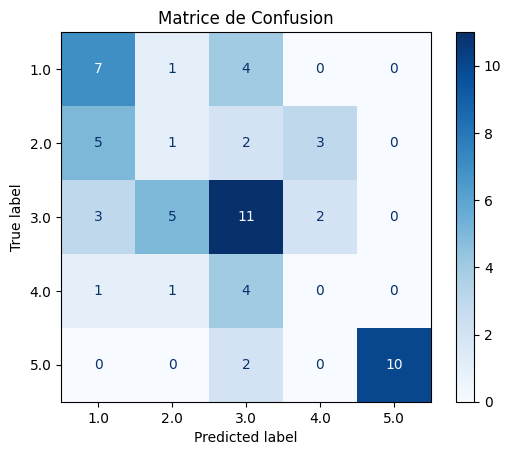

In [264]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion")
plt.show()

Voici une documentation d√©taill√©e de ce qui a √©t√© fait dans votre Jupyter Notebook jusqu'√† pr√©sent :

---

### **1. Importation des biblioth√®ques**
Les biblioth√®ques n√©cessaires pour le traitement des donn√©es, la visualisation et la mod√©lisation ont √©t√© import√©es :
- `pandas`, `numpy` pour la manipulation des donn√©es.
- `matplotlib.pyplot`, `seaborn` pour la visualisation.
- `scipy`, `sklearn` pour les statistiques et la mod√©lisation.
- `imblearn` pour la gestion des donn√©es d√©s√©quilibr√©es avec SMOTE.

---

### **2. Chargement des donn√©es**
- Les donn√©es brutes ont √©t√© charg√©es depuis un fichier CSV : `Dataset_brute.csv`.
- Une copie des donn√©es a √©t√© cr√©√©e pour √©viter de modifier les donn√©es originales.

---

### **3. S√©lection des variables d'int√©r√™t**
- Une liste de variables pertinentes pour l'analyse a √©t√© d√©finie, incluant des variables li√©es aux maladies r√©nales chroniques, au diab√®te, √† l'hypertension, et aux analyses biologiques.
- Des variables suppl√©mentaires ont √©t√© ajout√©es pour enrichir l'analyse.

---

### **4. V√©rification des colonnes**
- V√©rification de l'existence des colonnes s√©lectionn√©es dans le DataFrame.
- Avertissement affich√© pour les colonnes manquantes.

---

### **5. Pr√©paration des donn√©es**
- Suppression des lignes avec des valeurs manquantes dans la colonne cible (`Stage de l'IRC`).
- Transformation des valeurs cat√©goriques en valeurs num√©riques √† l'aide d'un mapping.
- Gestion des intervalles dans les colonnes en calculant la moyenne des bornes.

---

### **6. Gestion des valeurs manquantes**
- Remplacement des valeurs manquantes dans les colonnes num√©riques par la m√©diane.
- Remplacement des valeurs manquantes dans les colonnes cat√©goriques par le mode.

---

### **7. Gestion des valeurs aberrantes**
- D√©tection des valeurs aberrantes √† l'aide de boxplots et des limites statistiques (IQR).
- Remplacement des valeurs aberrantes par la m√©diane.

---

### **8. Encodage et transformation des donn√©es**
- Les colonnes cat√©goriques ont √©t√© encod√©es avec `OneHotEncoder`.
- Les colonnes num√©riques ont √©t√© standardis√©es avec `StandardScaler`.

---

### **9. √âquilibrage des classes**
- Utilisation de SMOTE pour g√©n√©rer des donn√©es synth√©tiques et √©quilibrer les classes dans la variable cible.

---

### **10. Mod√©lisation**
- Plusieurs mod√®les de classification ont √©t√© test√©s, notamment :
    - Arbre de d√©cision
    - Random Forest
    - Gradient Boosting
    - SVM
    - KNN
    - R√©gression Logistique
- Les performances des mod√®les ont √©t√© √©valu√©es √† l'aide de la pr√©cision et du rapport de classification.

---

### **11. Visualisation**
- Visualisation des valeurs manquantes avec une heatmap.
- Visualisation des distributions des variables et des valeurs aberrantes.
- Matrice de corr√©lation pour analyser les relations entre les variables.

---

### **12. Sauvegarde des donn√©es**
- Les donn√©es nettoy√©es et transform√©es ont √©t√© sauvegard√©es dans des fichiers CSV et Excel pour une utilisation ult√©rieure.

---

### **13. R√©sultats**
- Les r√©sultats des mod√®les ont √©t√© compar√©s pour identifier le mod√®le le plus performant.
- Une matrice de confusion a √©t√© affich√©e pour √©valuer les pr√©dictions.

---

Si vous avez besoin de d√©tails suppl√©mentaires sur une √©tape sp√©cifique, n'h√©sitez pas √† demander !